In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# uploaded csv to my drive
url = 'https://drive.google.com/file/d/1sE0nweV6dTYO2tWro-KZPPRox5cnxfgS/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [3]:
# get csv from my drive url
dataset = pd.read_csv(url)
dataset.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [4]:
dataset.head(2).T

0          1
encounter_id                               2278392     149190
patient_nbr                                8222157   55629189
race                                     Caucasian  Caucasian
gender                                      Female     Female
age                                         [0-10)    [10-20)
weight                                           ?          ?
admission_type_id                                6          1
discharge_disposition_id                        25          1
admission_source_id                              1          7
time_in_hospital                                 1          3
payer_code                                       ?          ?
medical_specialty         Pediatrics-Endocrinology          ?
num_lab_procedures                              41         59
num_procedures                                   0          0
num_medications                                  1         18
number_outpatient                                0          0
number_emergency                                 0          0
number_inpatient                                 0          0
diag_1                                      250.83        276
diag_2                                           ?     250.01
diag_3                                           ?        255
number_diagnoses                                 1          9
max_glu_serum                                 None       None
A1Cresult                                     None       None
metformin                                       No         No
repaglinide                                     No         No
nateglinide                                     No         No
chlorpropamide                                  No         No
glimepiride                                     No         No
acetohexamide                                   No         No
glipizide                                       No         No
glyburide                                       No         No
tolbutamide                                     No         No
pioglitazone                                    No         No
rosiglitazone                                   No         No
acarbose                                        No         No
miglitol                                        No         No
troglitazone                                    No         No
tolazamide                                      No         No
examide                                         No         No
citoglipton                                     No         No
insulin                                         No         Up
glyburide-metformin                             No         No
glipizide-metformin                             No         No
glimepiride-pioglitazone                        No         No
metformin-rosiglitazone                         No         No
metformin-pioglitazone                          No         No
change                                          No         Ch
diabetesMed                                     No        Yes
readmitted                                      NO        >30

In [5]:
# remove columns that all values are the same
for col in dataset.columns:
    if len(dataset[col].unique()) == 1:
        print(col)
        dataset.drop(col,inplace=True,axis=1)

print('Now we have', len(dataset.columns),'columns')

examide
citoglipton
Now we have 48 columns


In [6]:
dataset[dataset.duplicated(['encounter_id'])]

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 48 columns]

In [7]:
# finding unique patients
print( 'Unique records:',len(dataset.patient_nbr.unique()) ,'\nDuplicates: ', len(dataset.patient_nbr)-len(dataset.patient_nbr.unique()))

Unique records: 71518 
Duplicates:  30248


In [8]:
#dataset.sort_values("patient_nbr", inplace=True)
dataset.drop_duplicates(subset ="patient_nbr", keep = 'first', inplace = True)

In [9]:
print('After removing duplicate there is:', len(dataset),  ' unique patients')

After removing duplicate there is: 71518  unique patients


In [10]:
# removing dead patients
dataset=dataset[~dataset.discharge_disposition_id.isin([11,13,14,19,20,21])] # 71518-69661 = 1857
dataset.shape

(69973, 48)

In [11]:
# finding missing percentages
for col in dataset.columns:
  percentage = len(dataset[dataset[col] == '?'])/len(dataset)
  if percentage:
    print("Column ", col, "has ", percentage, "percent of missing values")
    #print(col, percentage)

Column  race has  0.0274105726494505 percent of missing values
Column  weight has  0.9601560601946465 percent of missing values
Column  payer_code has  0.4346676575250454 percent of missing values
Column  medical_specialty has  0.48074257213496635 percent of missing values
Column  diag_1 has  0.00014291226615980449 percent of missing values
Column  diag_2 has  0.0041873293984822715 percent of missing values
Column  diag_3 has  0.01749246137796007 percent of missing values


In [12]:
# will remove weight and payer code
dataset.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
dataset.head()

encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  ...  tolazamide  insulin  \
0                 1                  41  ...          No       No   
1                 3                  59  ...          No       Up   
2                 2                  11  ...          No       No   
3                 2                  44  ...          No       Up   
4                 1                  51  ...          No   Steady   

   glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0                   No                   No                        No   
1                   No                   No                        No   
2                   No                   No                        No   
3                   No                   No                        No   
4                   No                   No                        No   

  metformin-rosiglitazone metformin-pioglitazone change  diabetesMed  \
0                      No                     No     No           No   
1                      No                     No     Ch          Yes   
2                      No                     No     No          Yes   
3                      No                     No     Ch          Yes   
4                      No                     No     Ch          Yes   

  readmitted  
0         NO  
1        >30  
2         NO  
3         NO  
4         NO  

[5 rows x 45 columns]

In [13]:
# removing invalid data
dataset=dataset.dropna()
dataset=dataset[~((dataset.admission_type_id.isin([5,6,8])) | (dataset.discharge_disposition_id.isin([18,25,26])) | (dataset.admission_source_id.isin([9,15,17,20,21] )))]  ##Removing nulls, not available or not mapped

print( 'After removing the invalid values remain', dataset.shape[0], 'patients')

After removing the invalid values remain 58810 patients


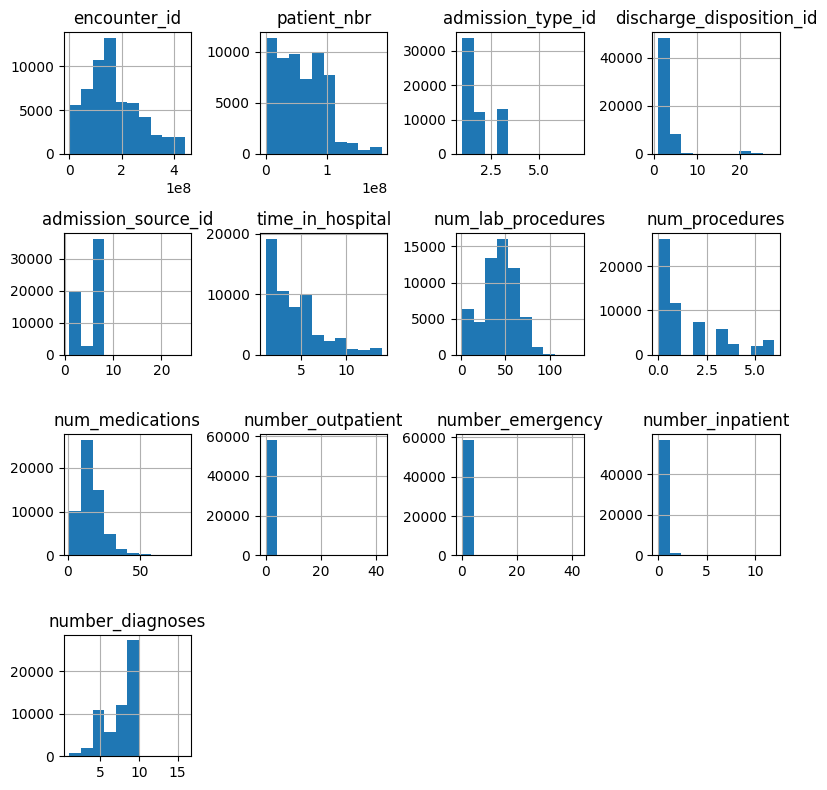

In [14]:
# Plot histograms for numeric variables
dataset.hist(figsize=(8, 8))
plt.tight_layout()
plt.show()

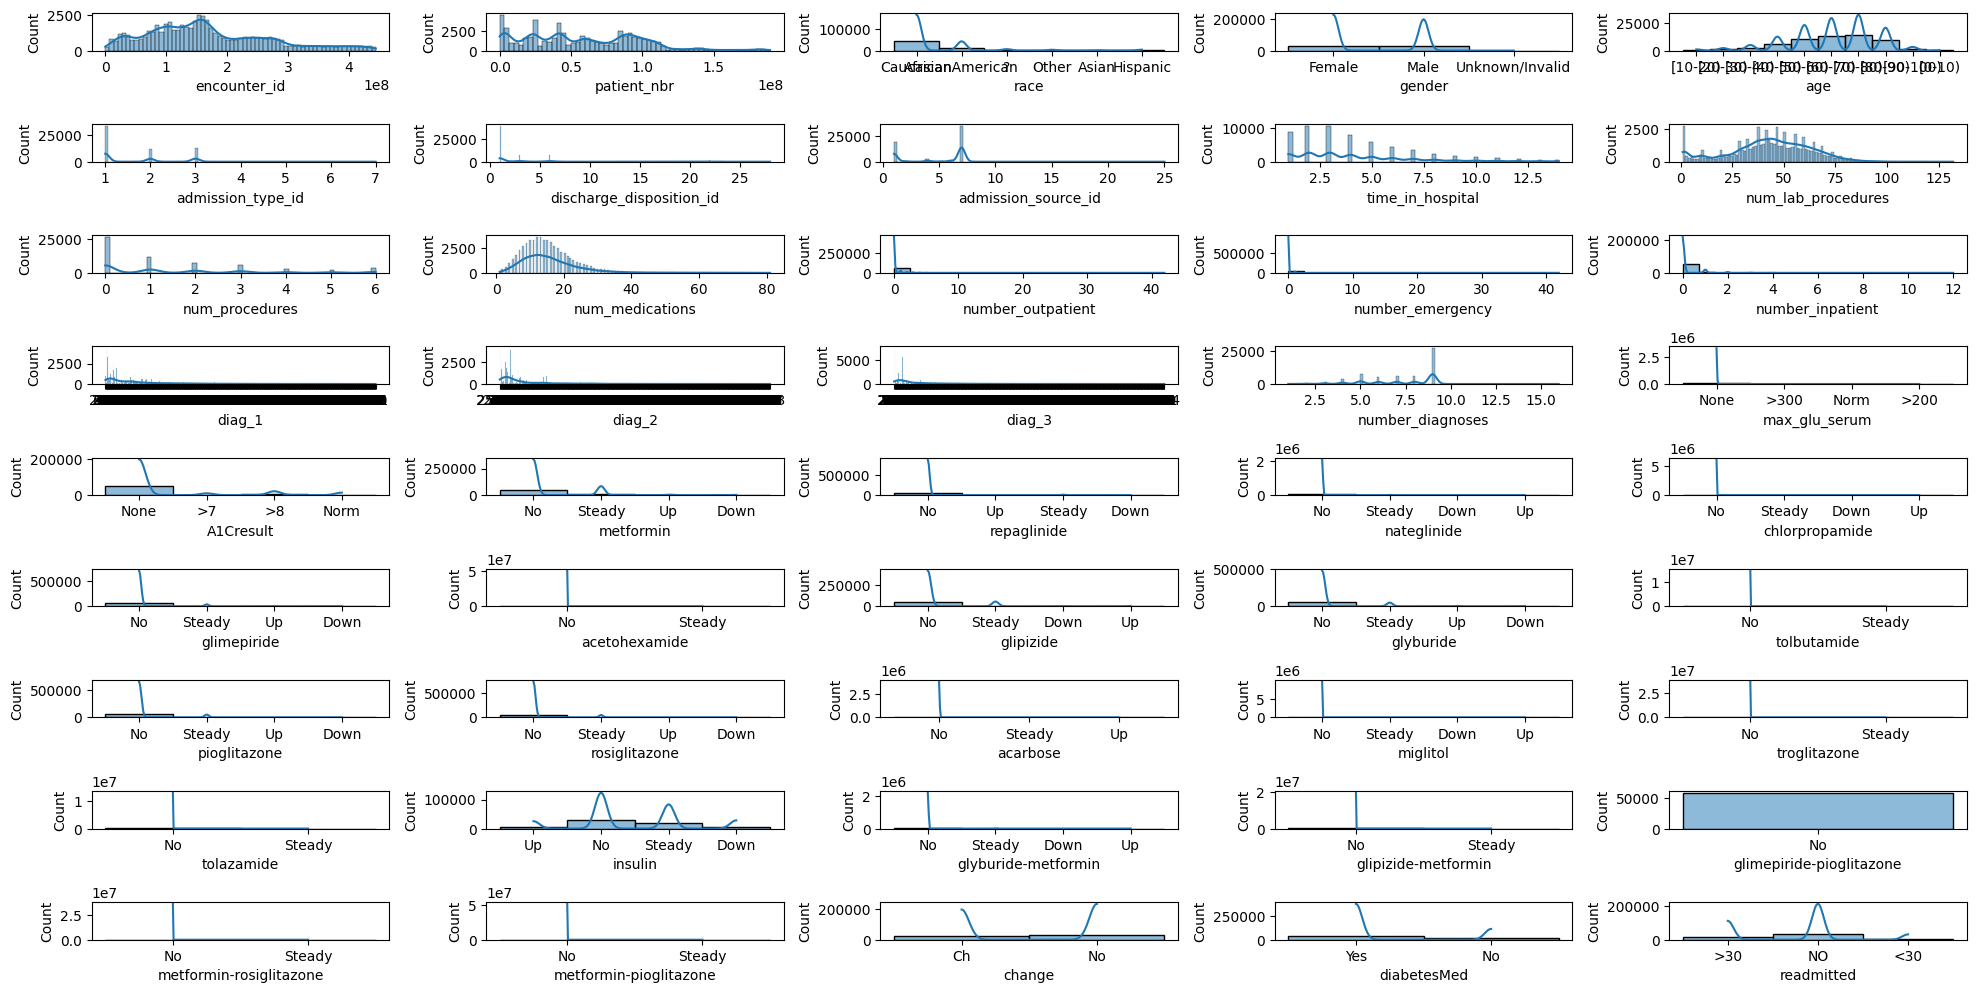

In [15]:
# histogram for all
plt.figure(figsize=(20, 10))
for i, feature in enumerate(dataset.columns):
    plt.subplot(9, 5, i+1)
    sns.histplot(dataset[feature], kde=True)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [16]:
dataset.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

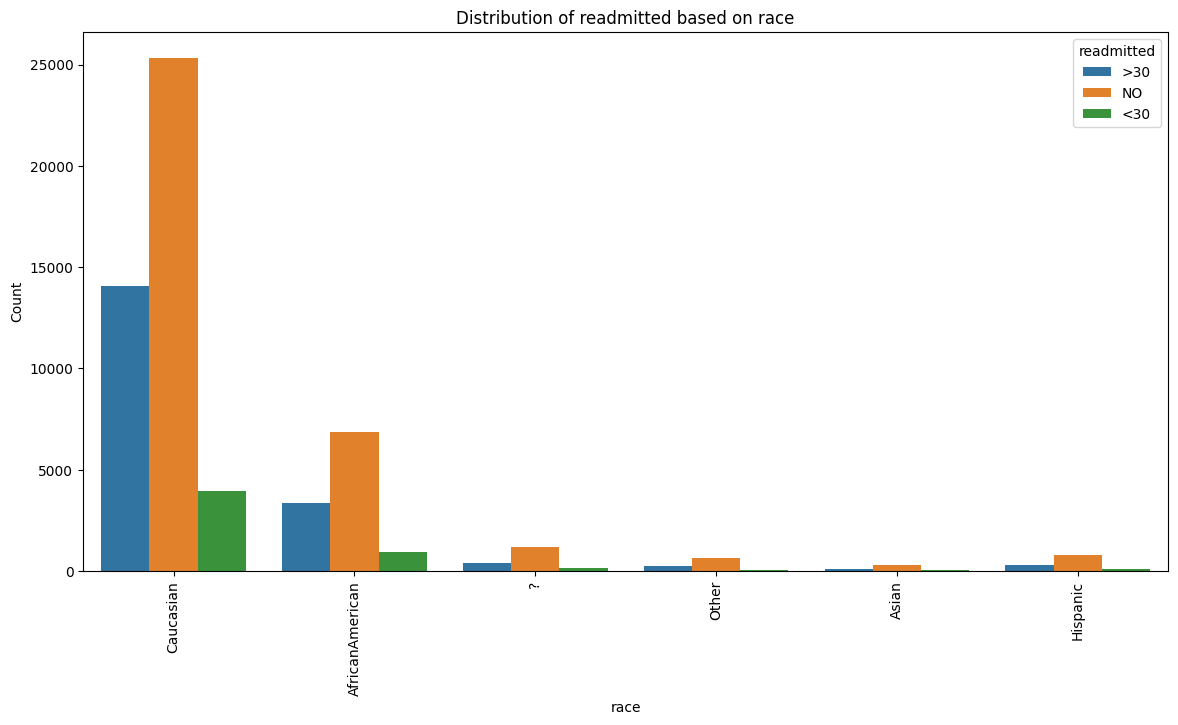

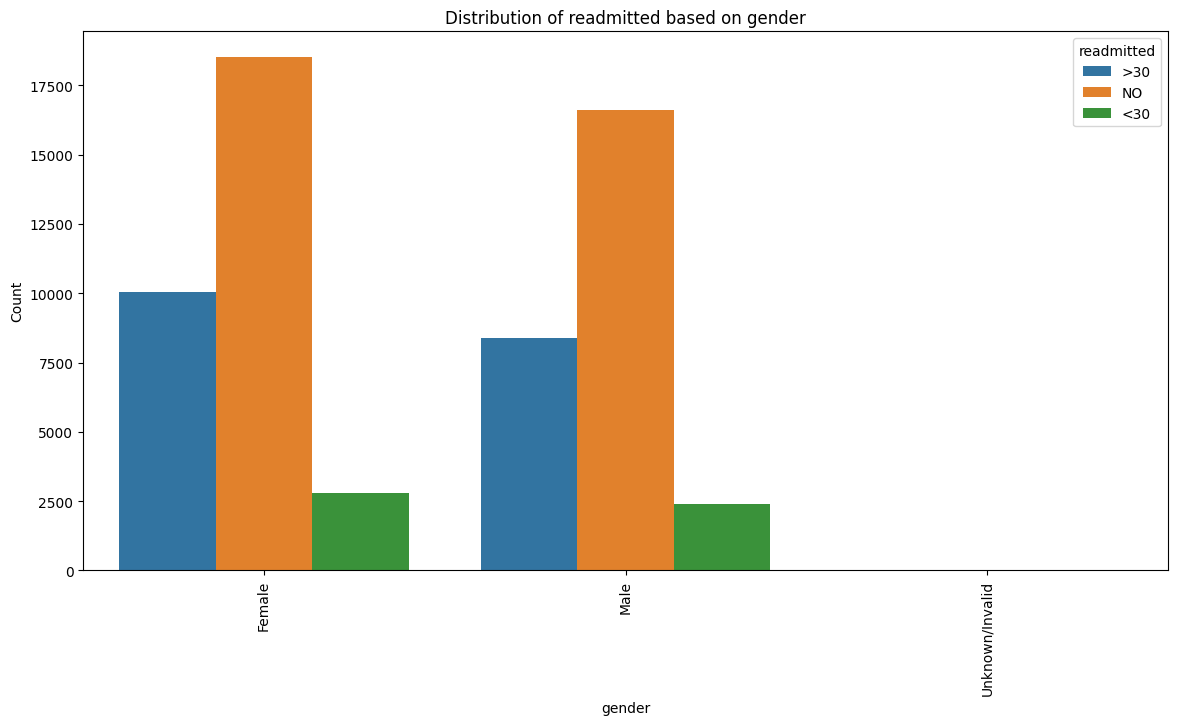

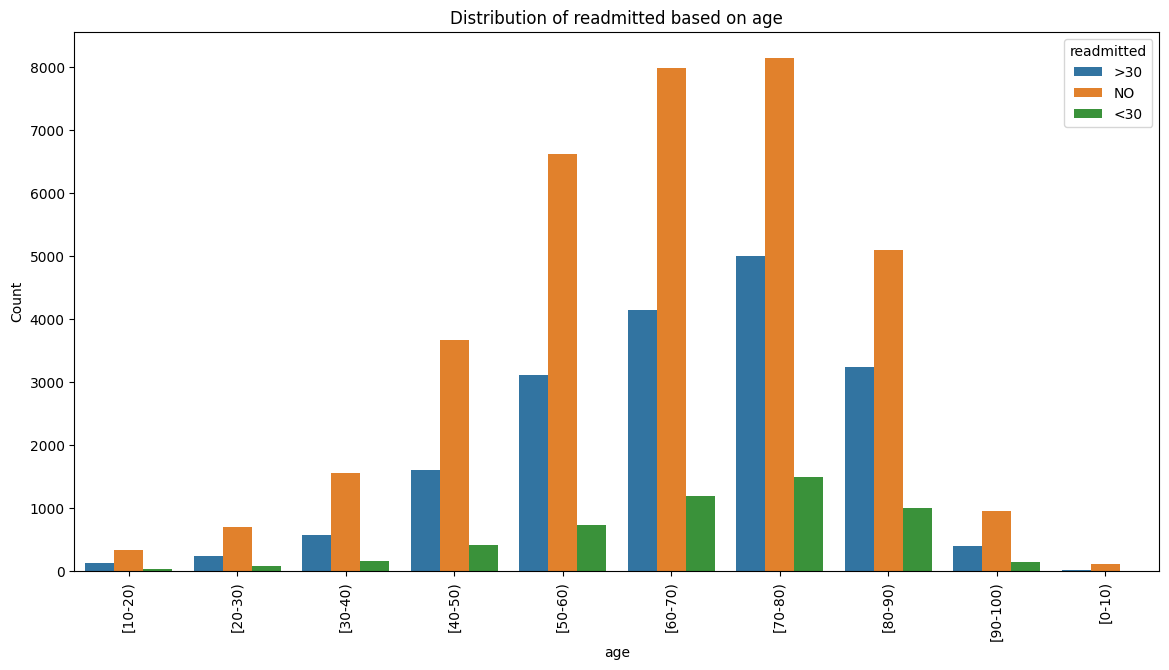

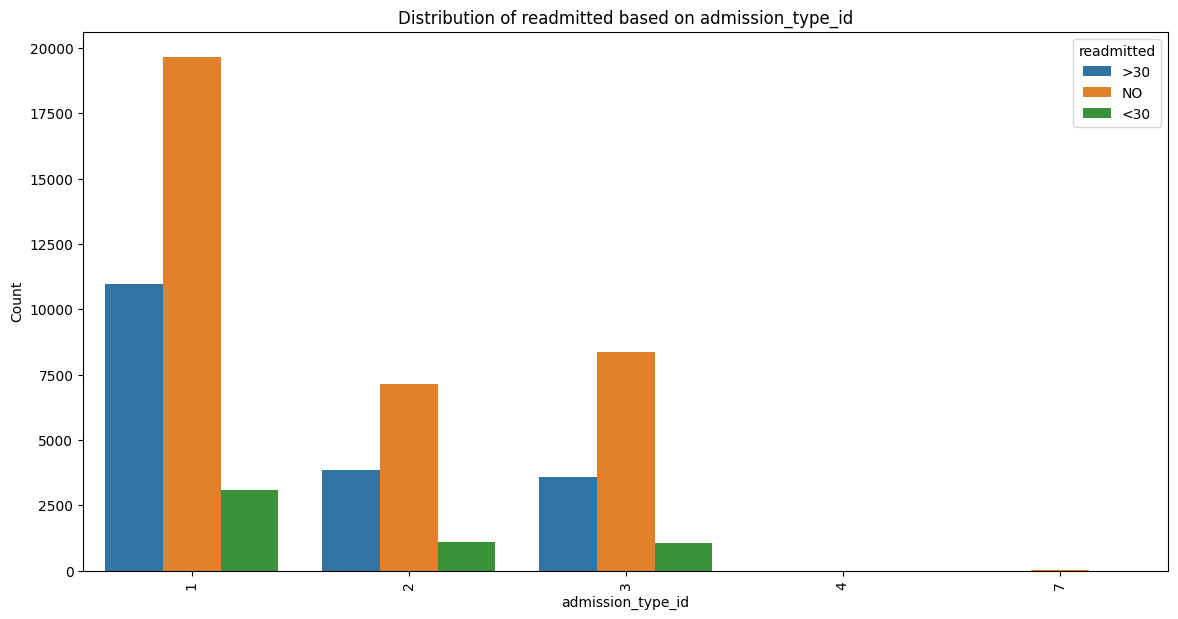

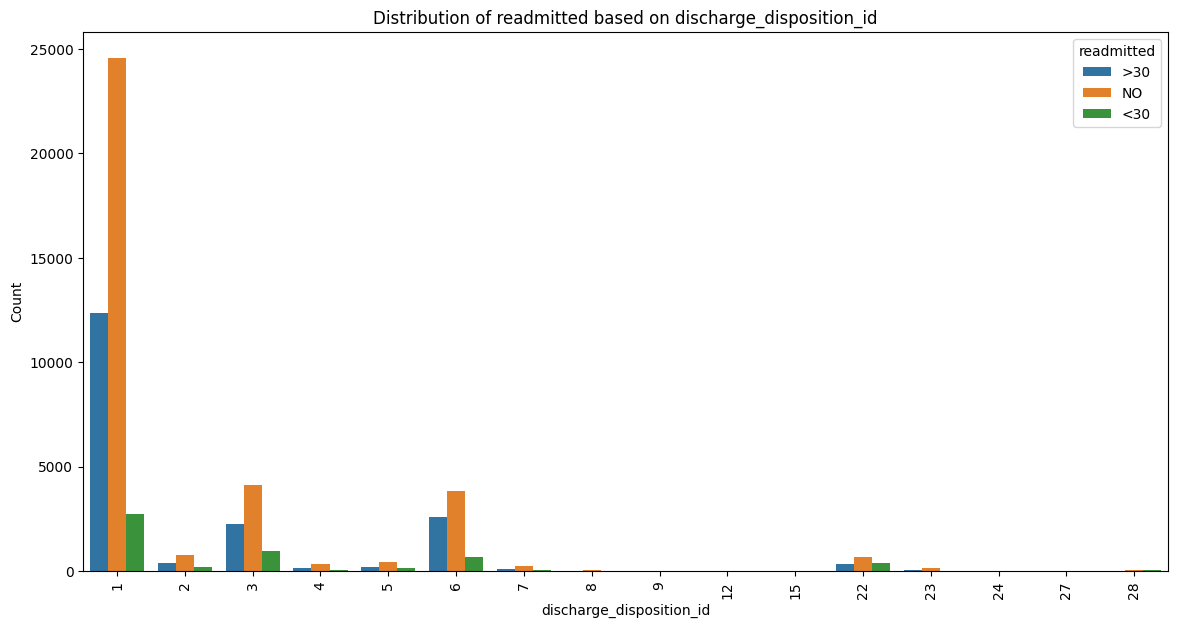

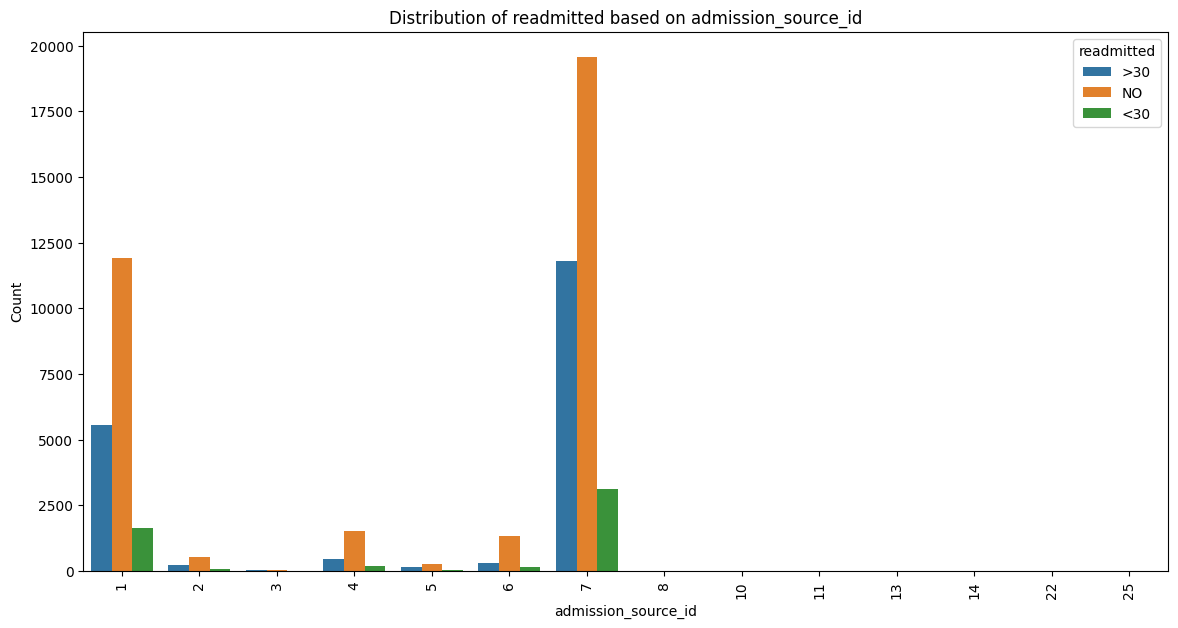

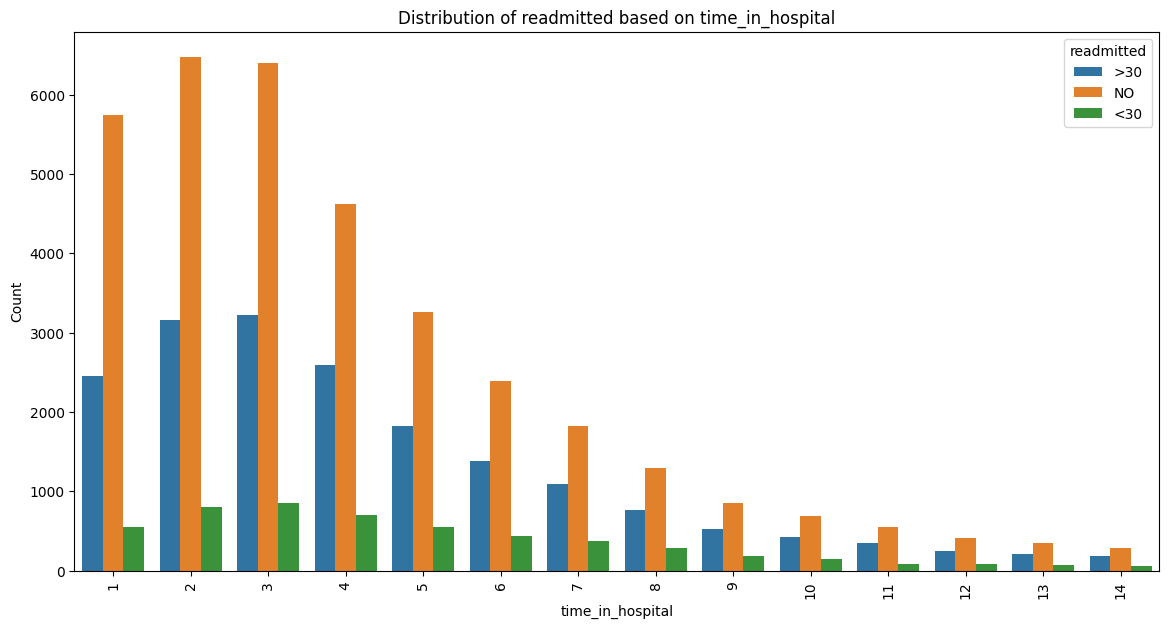

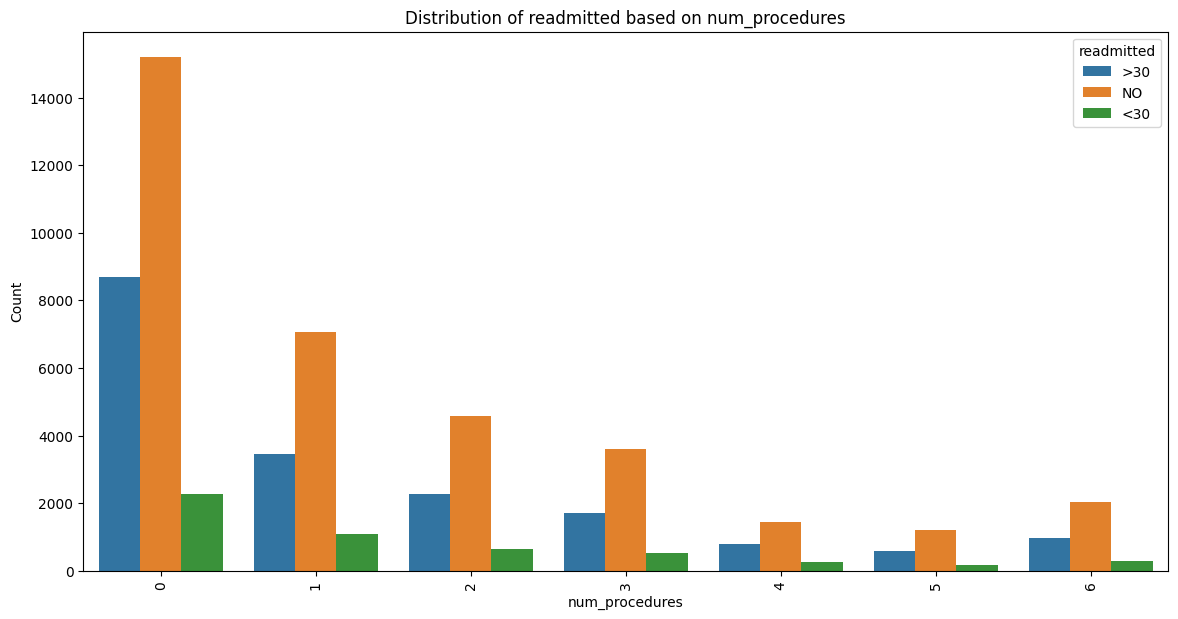

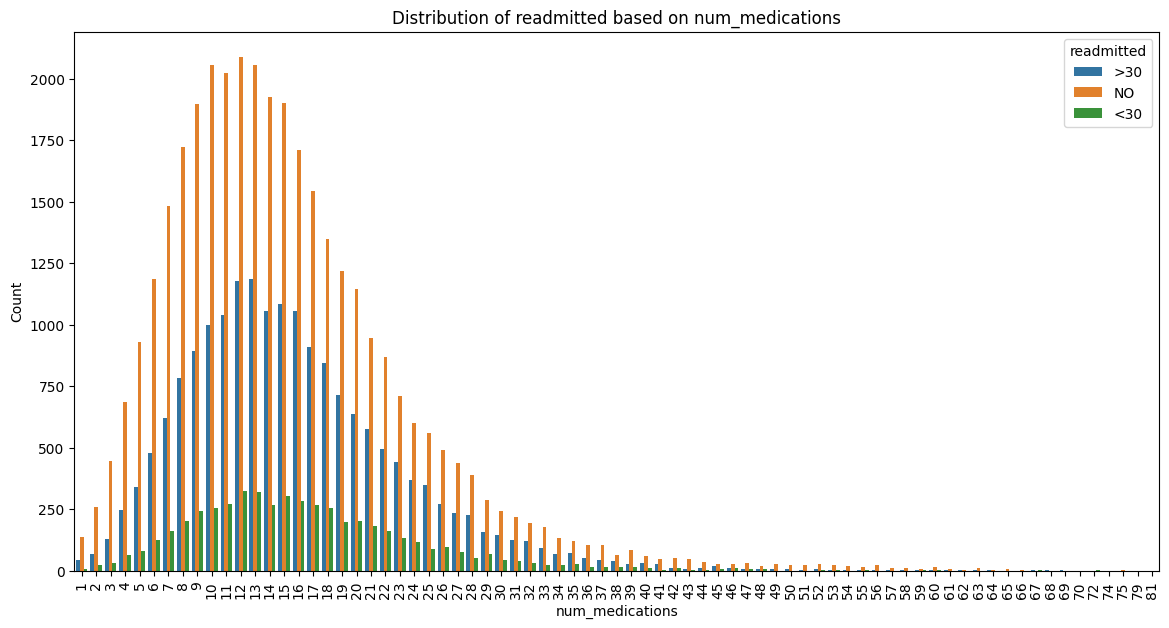

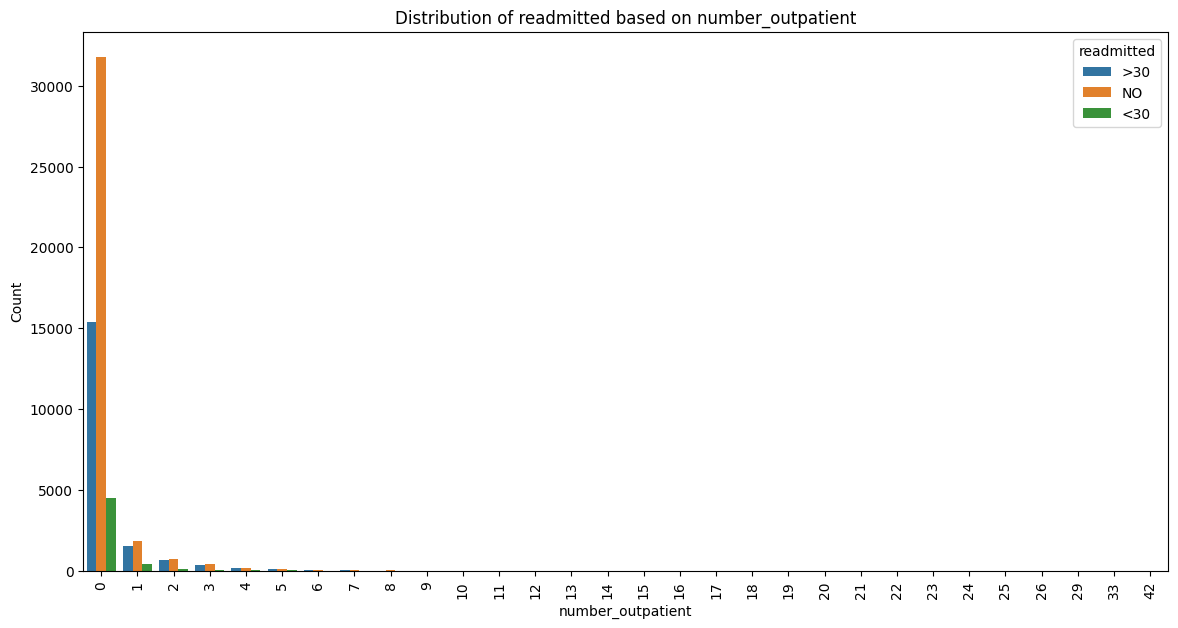

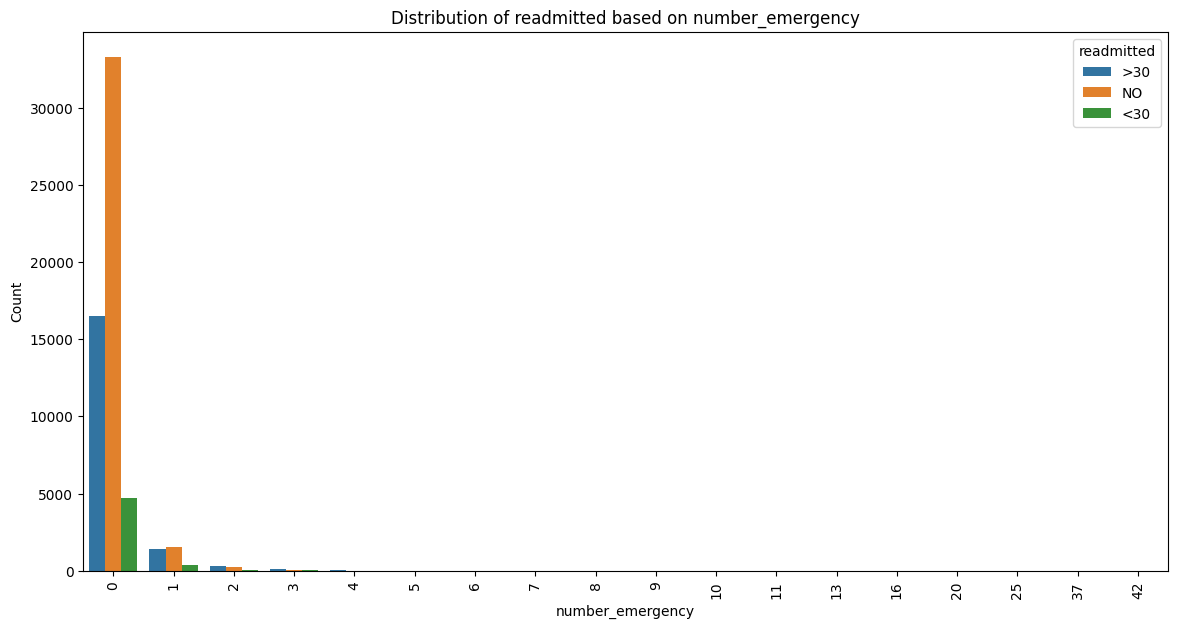

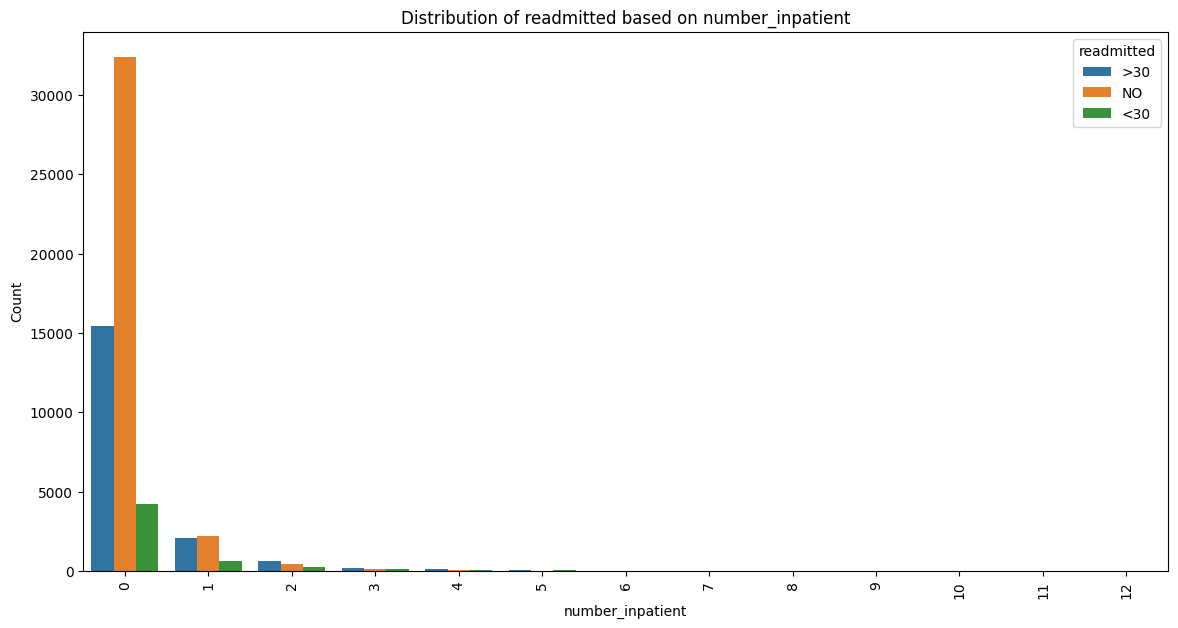

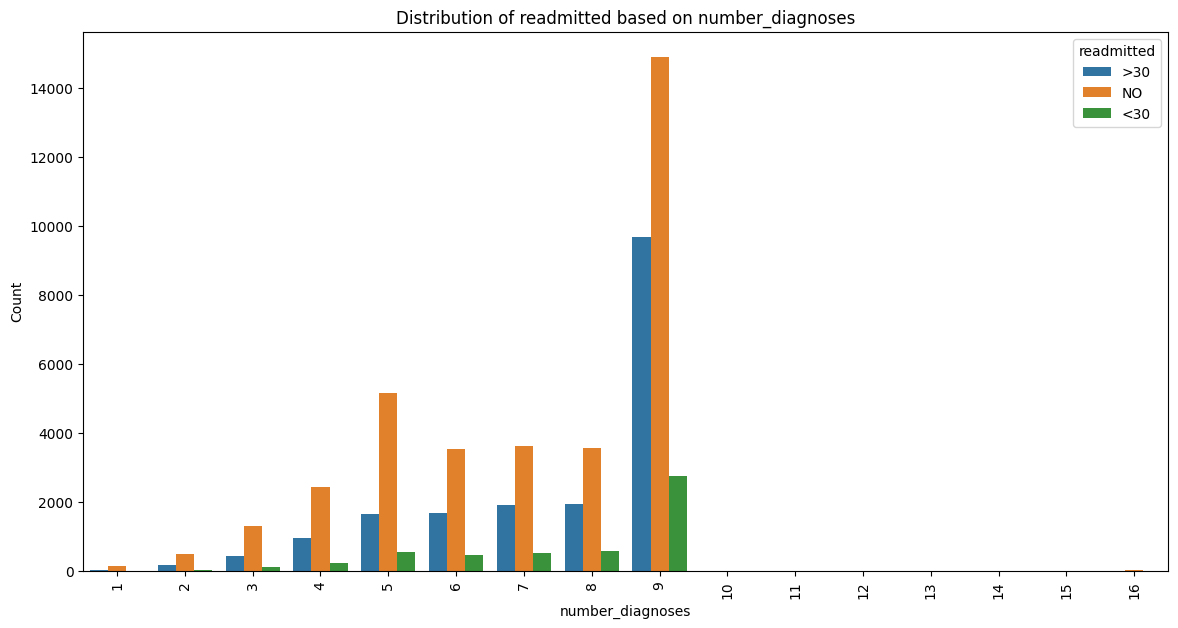

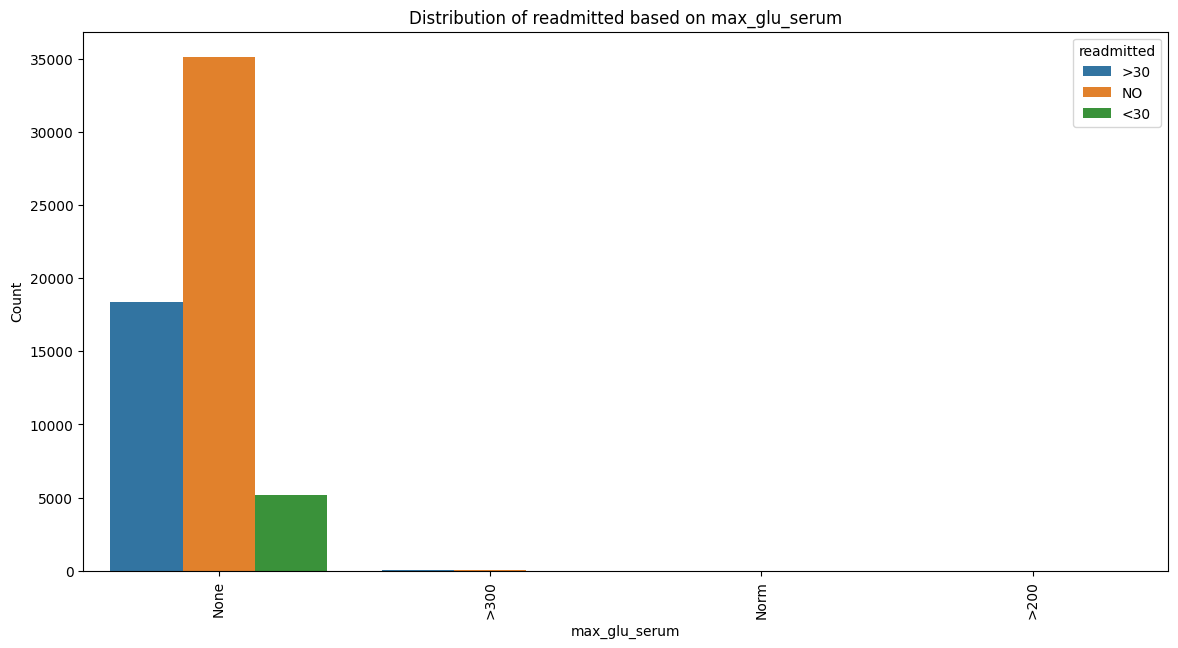

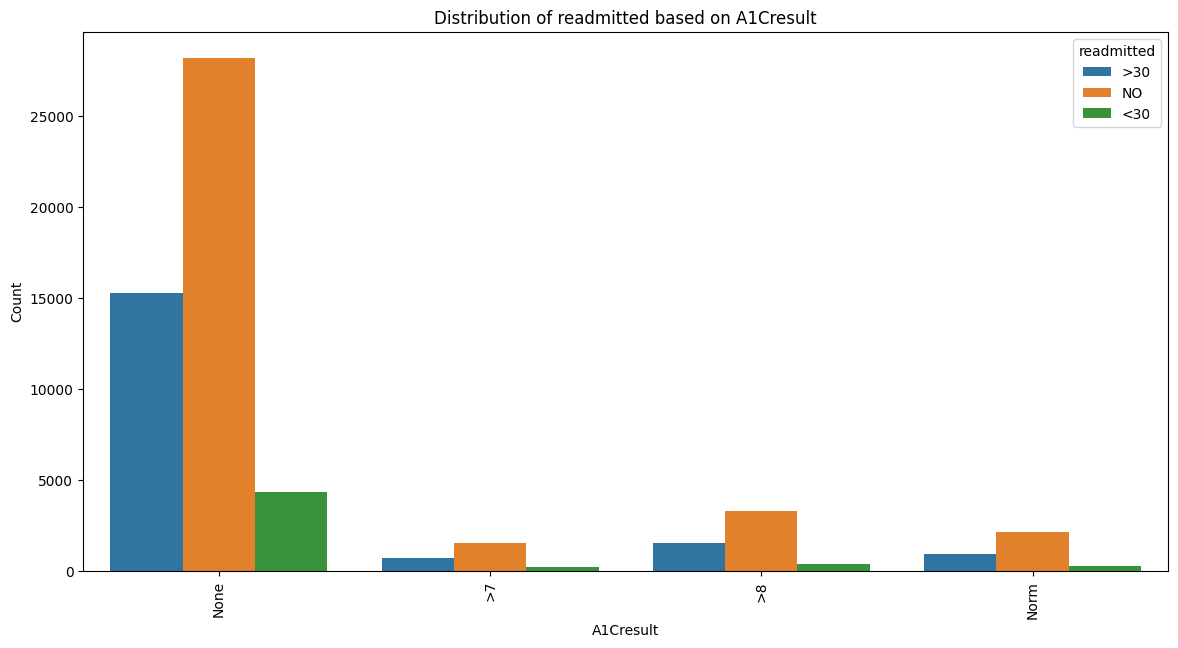

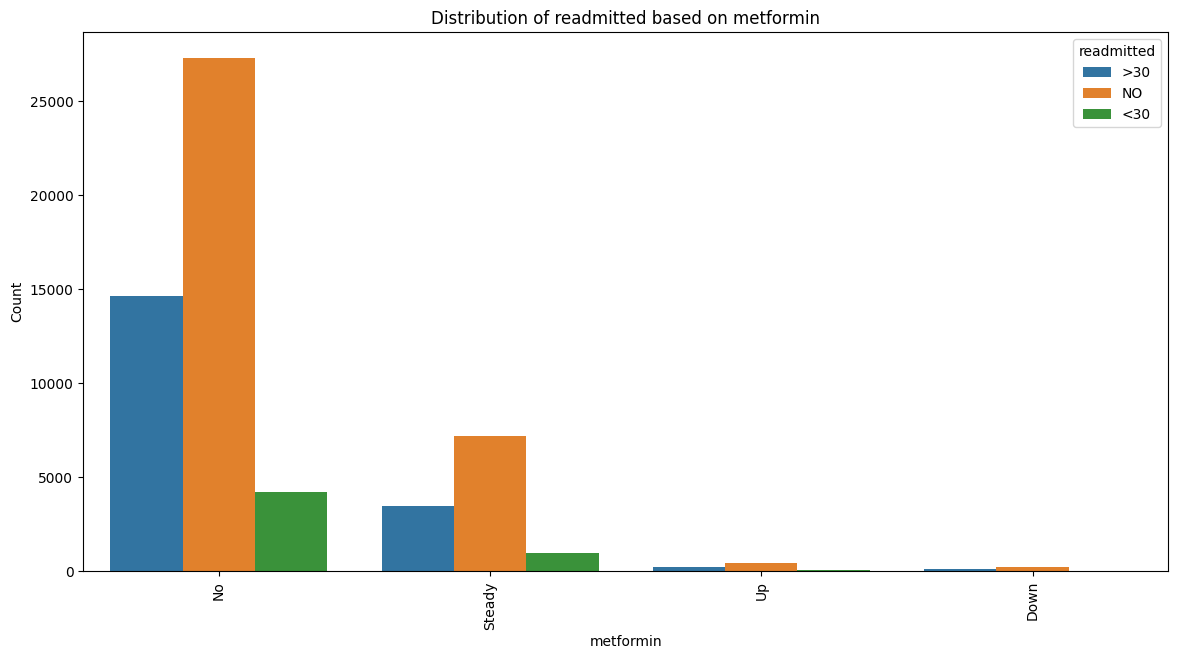

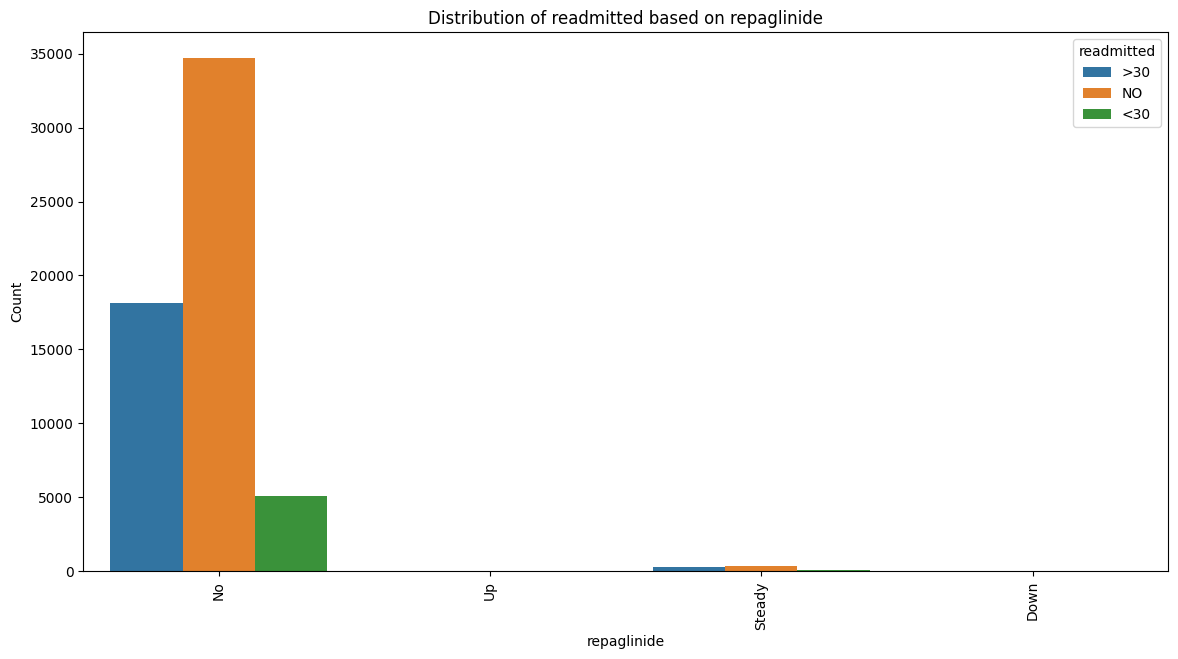

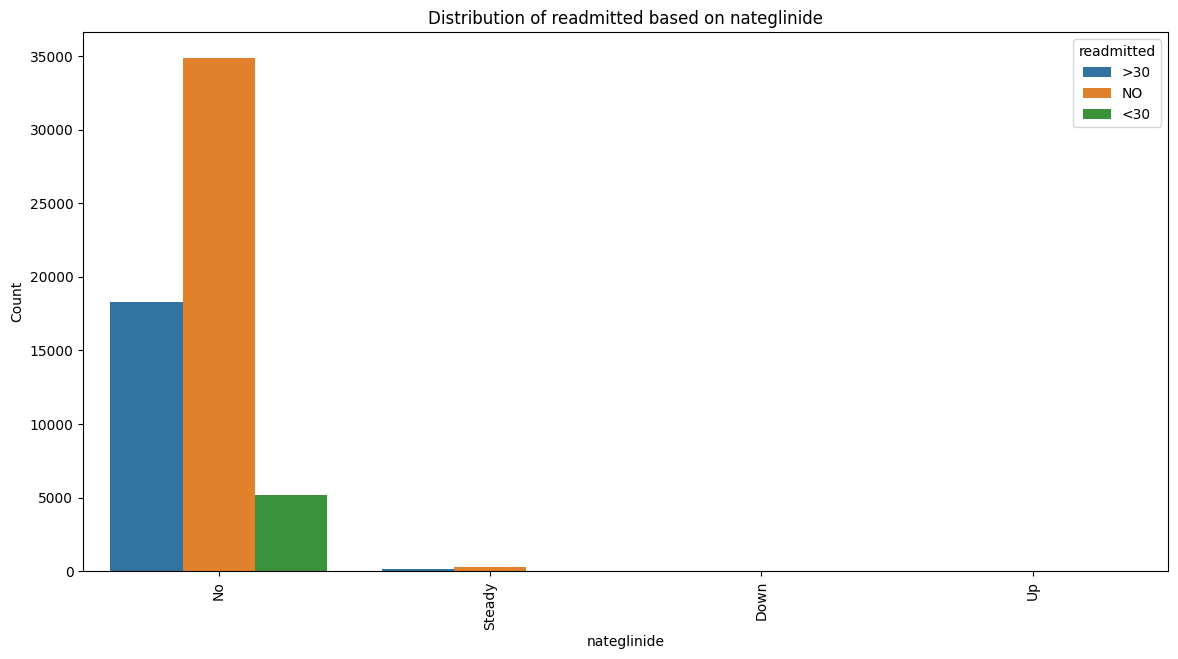

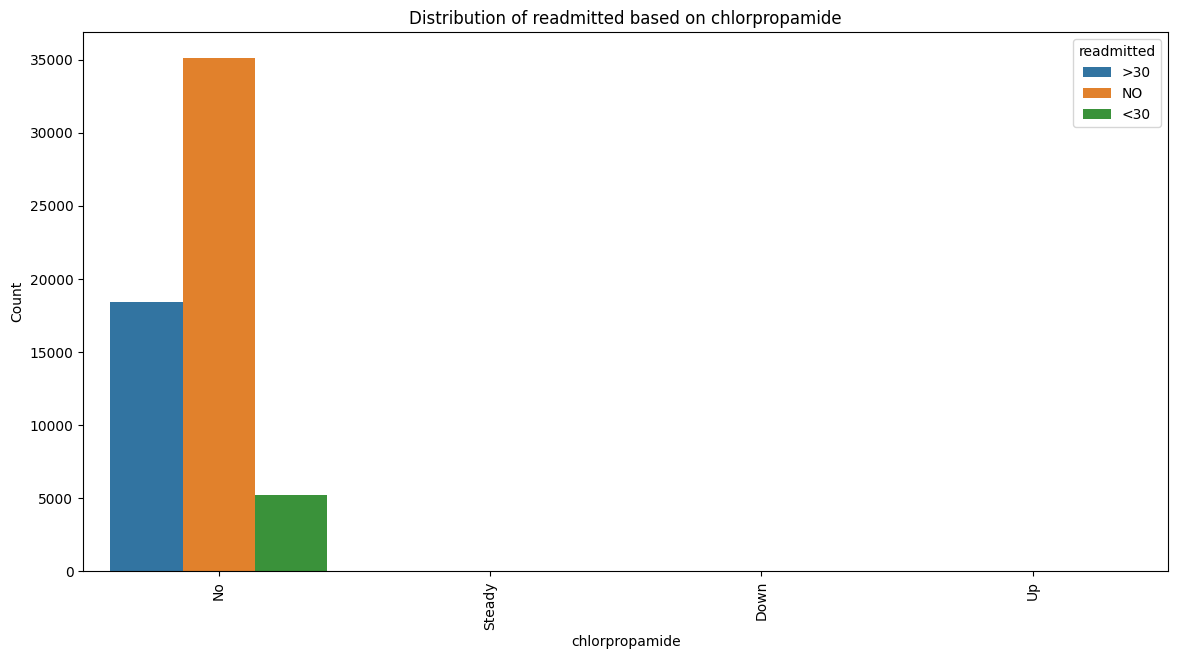

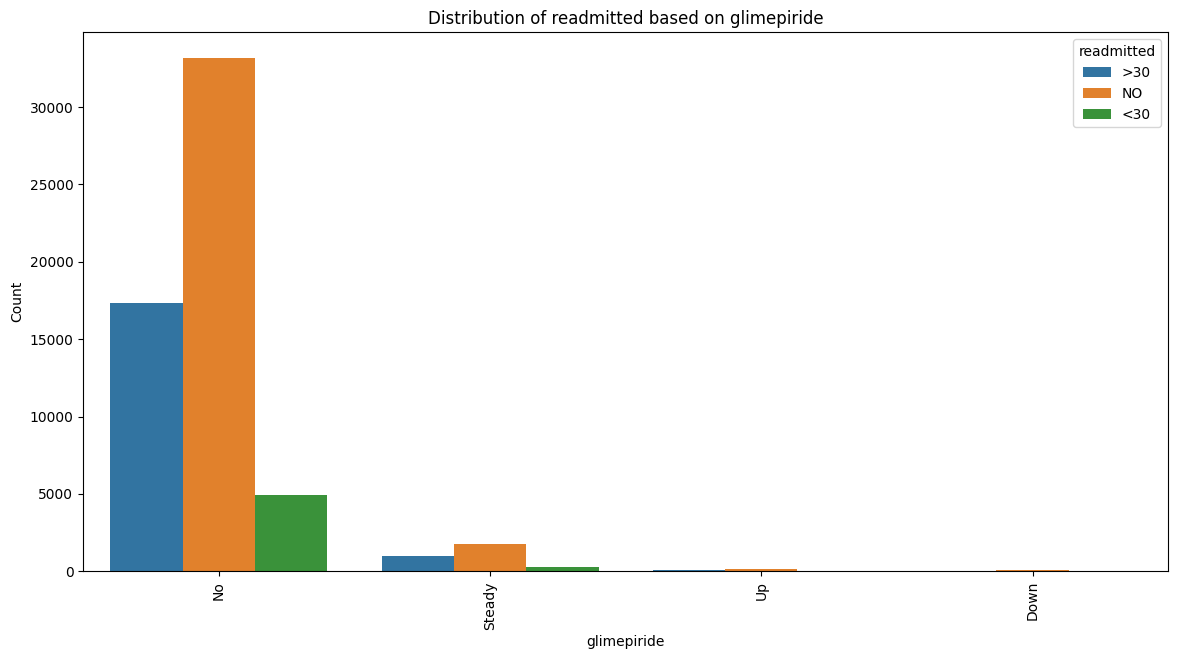

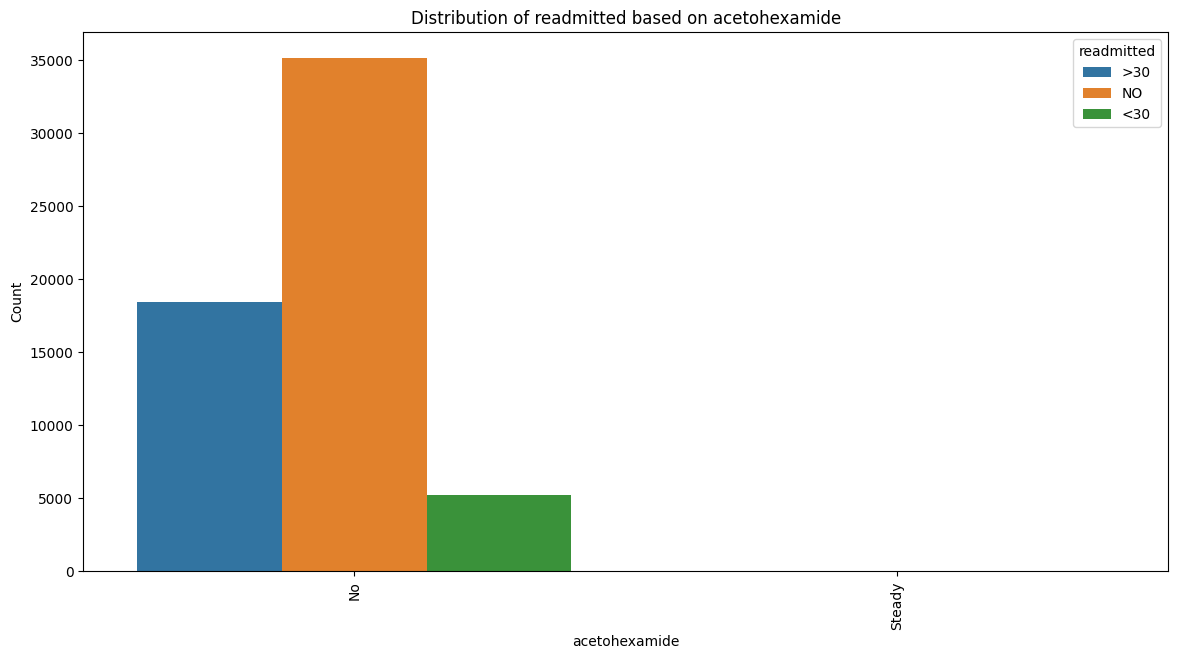

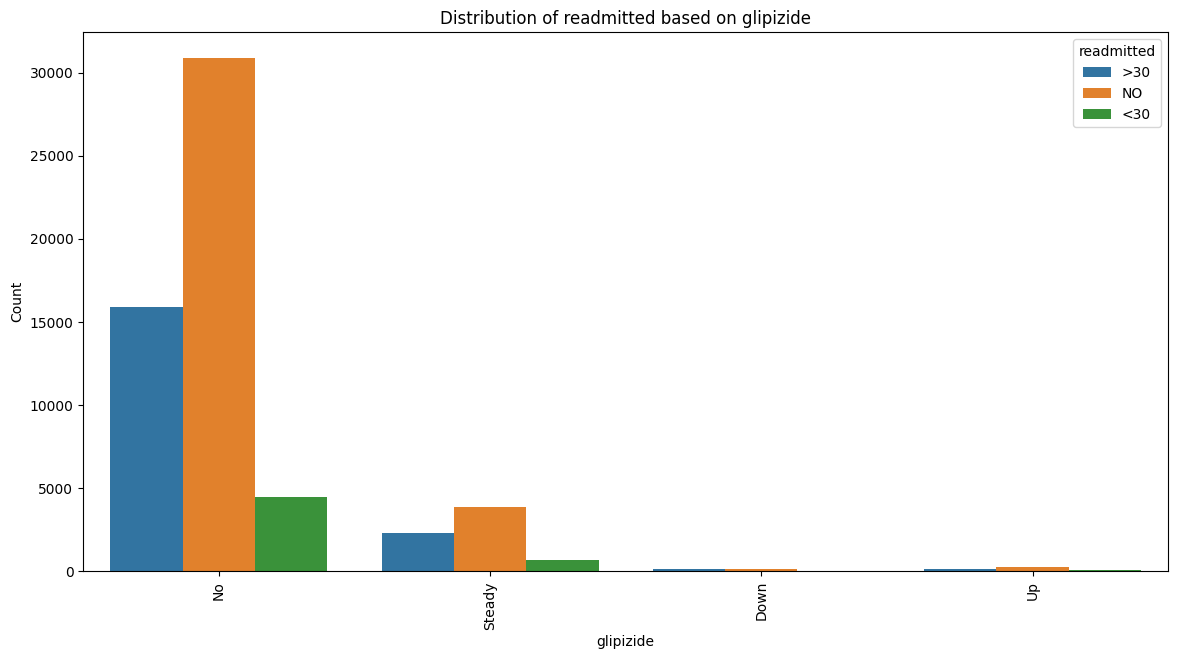

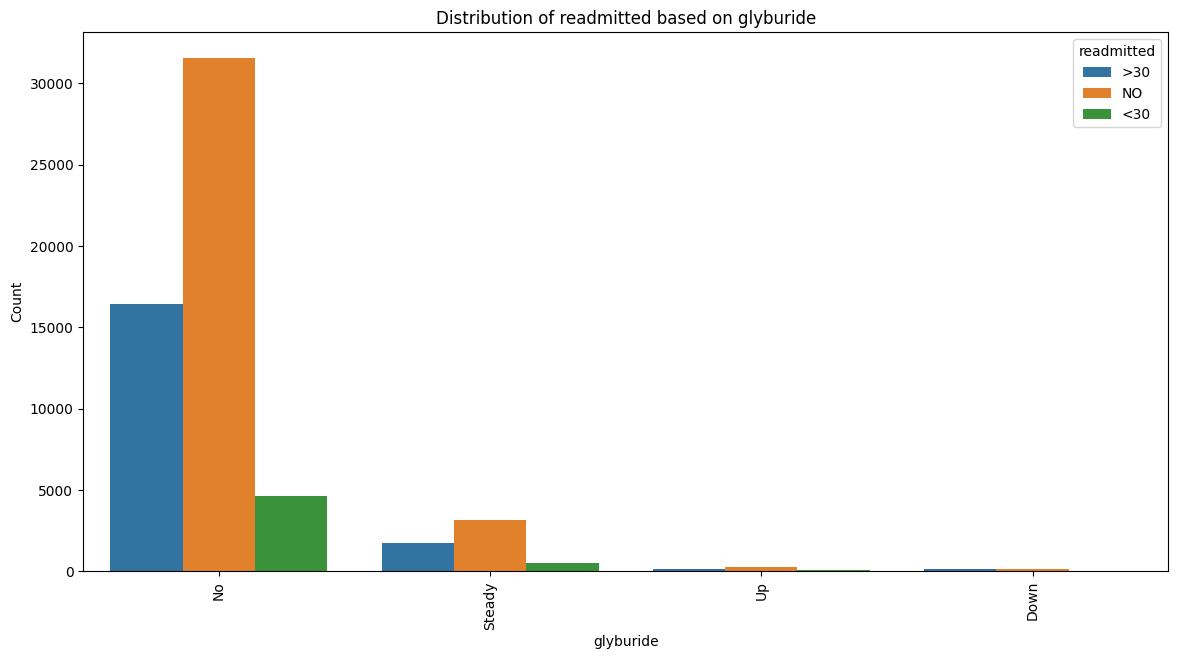

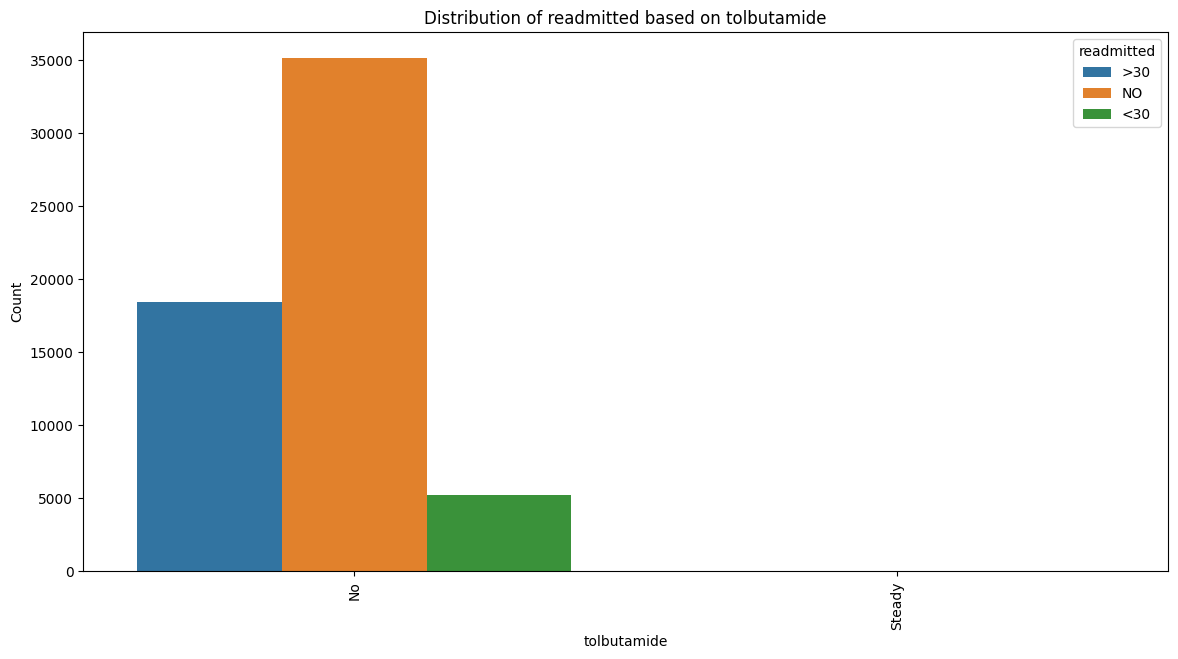

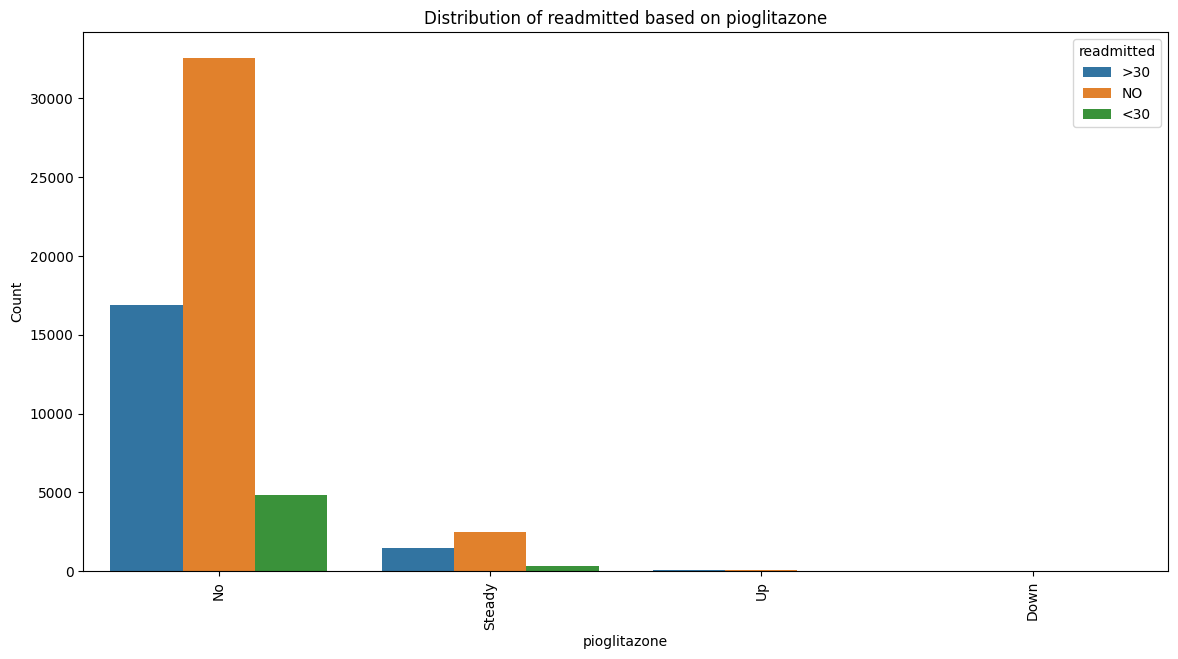

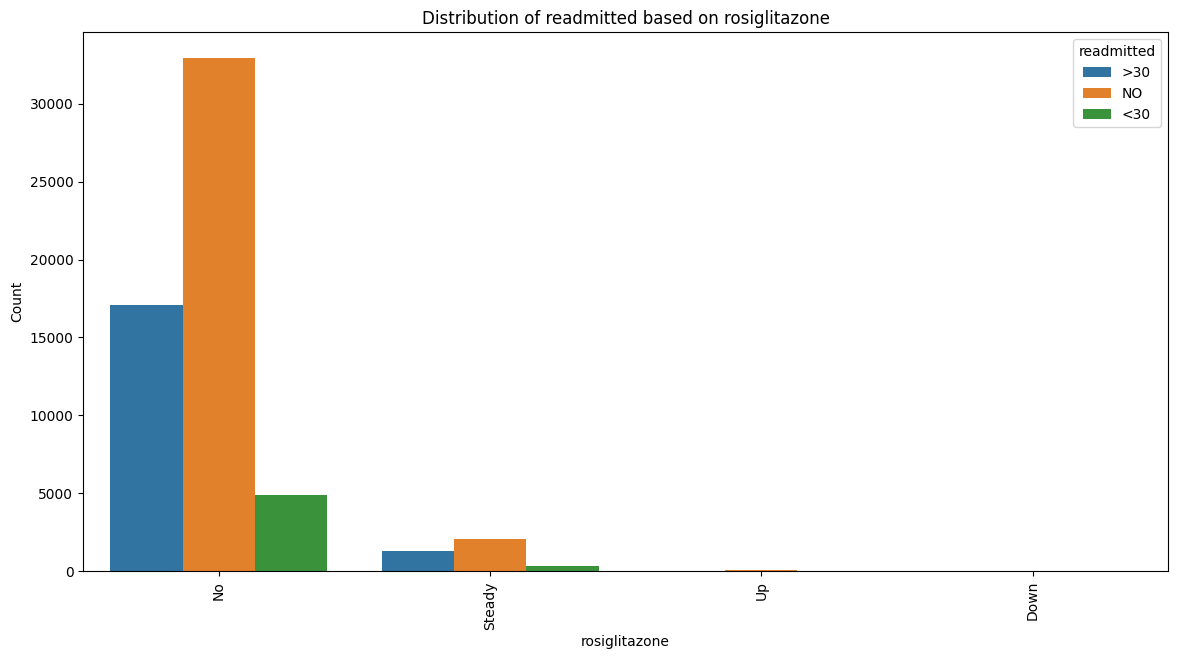

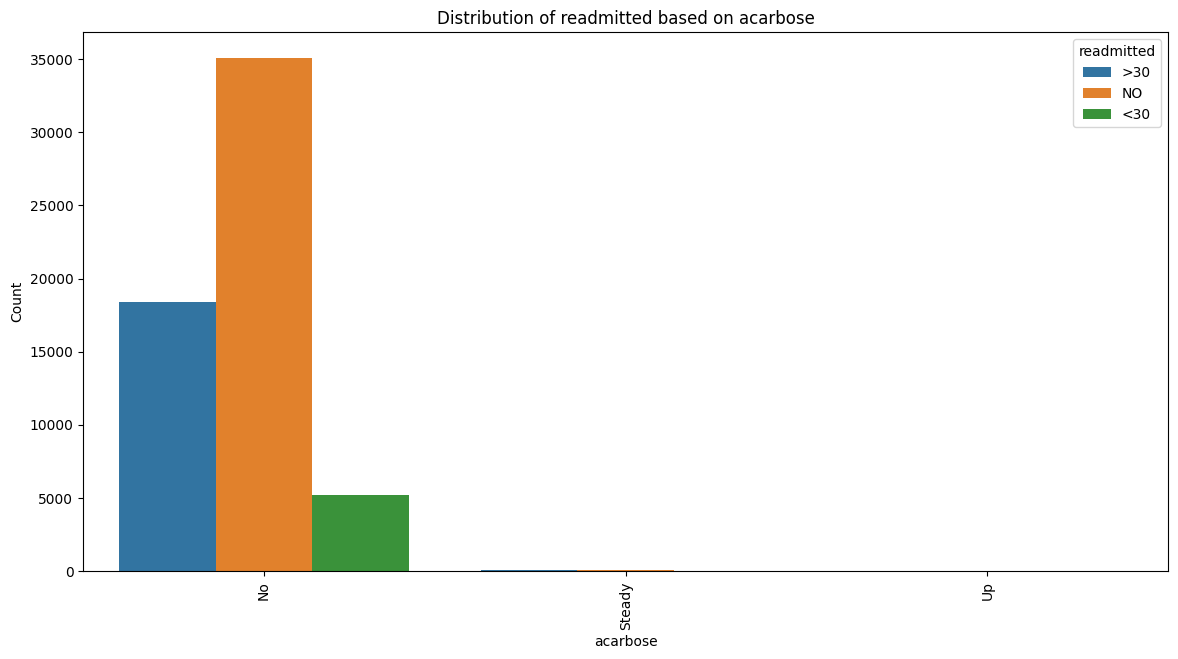

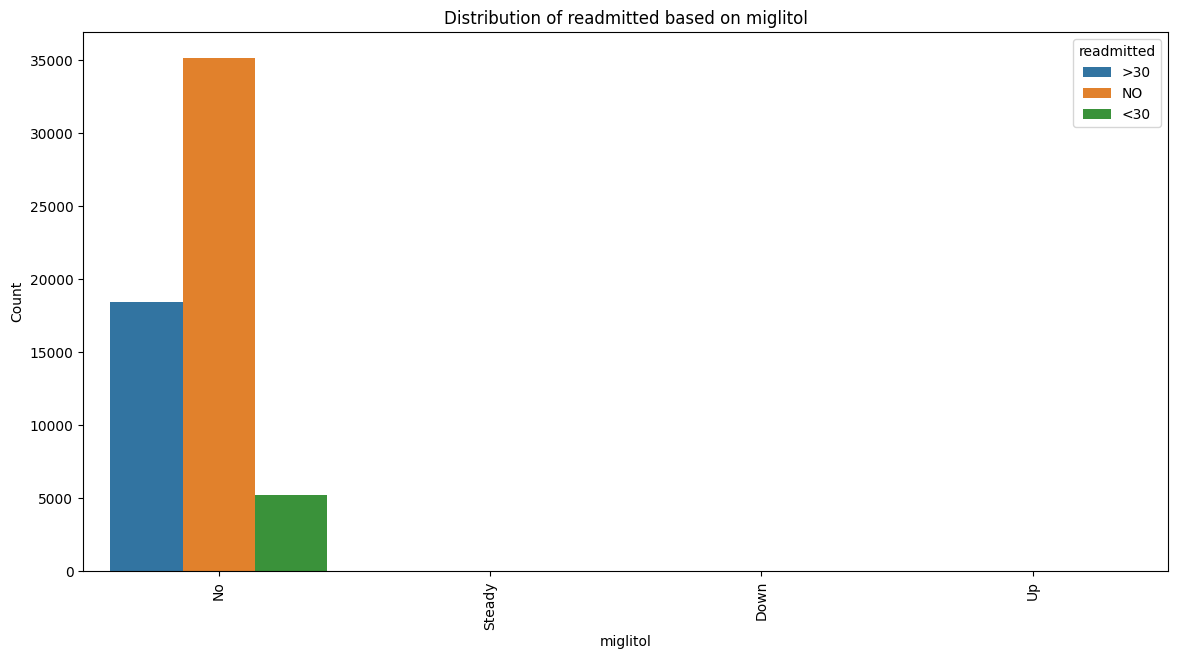

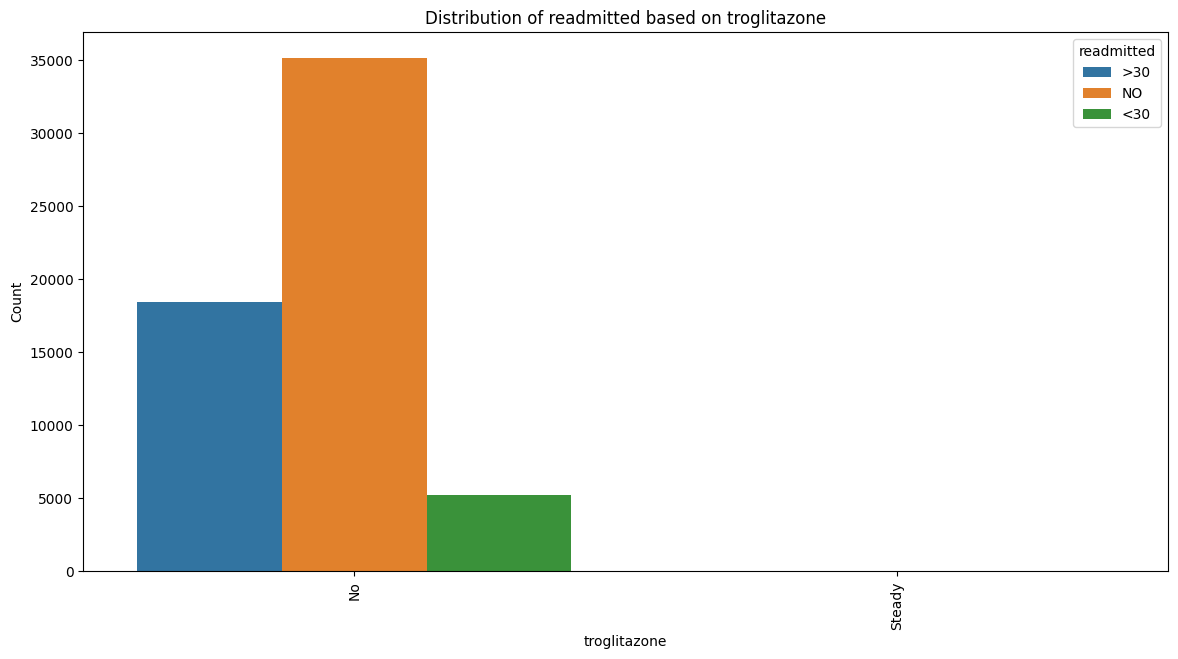

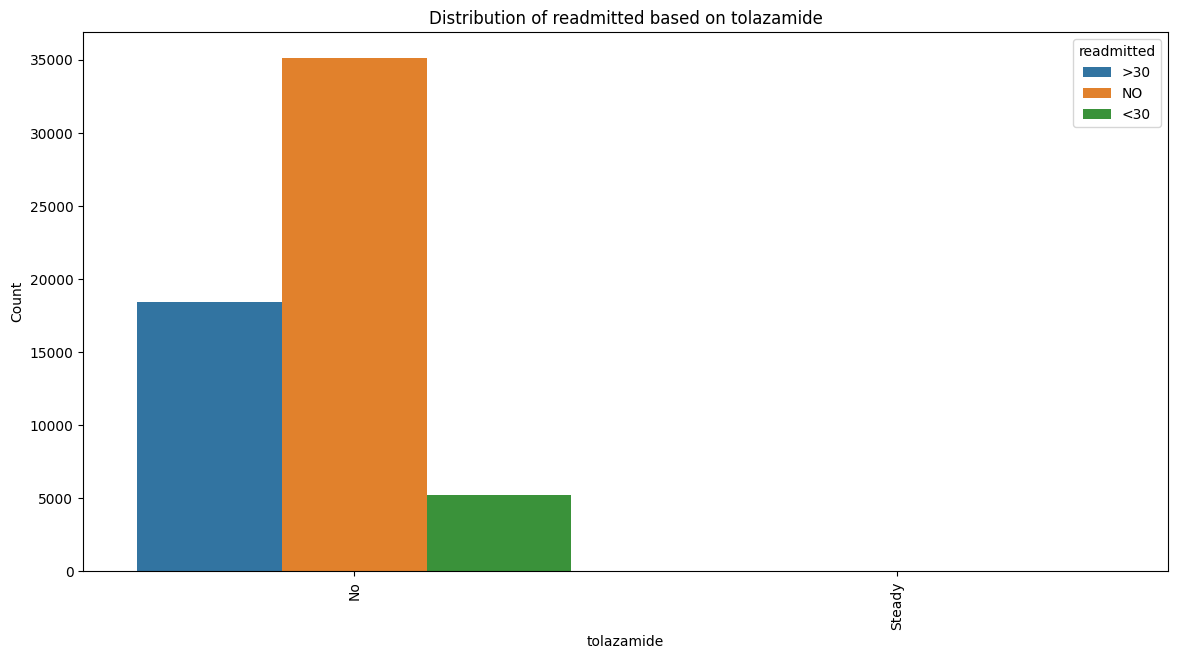

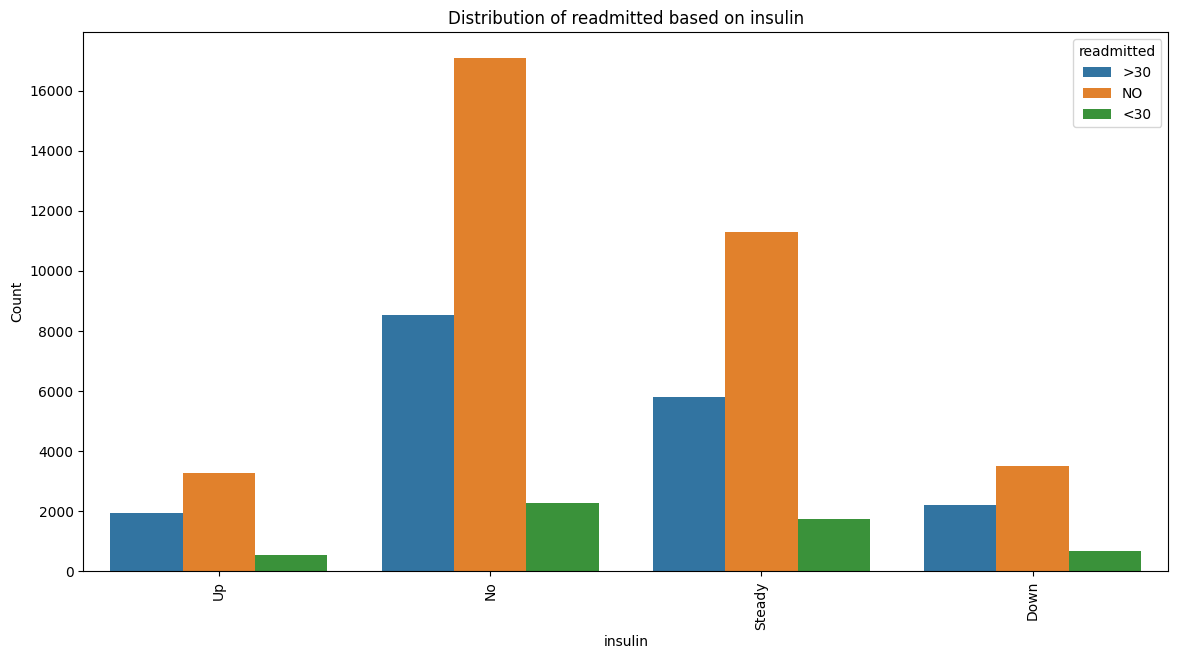

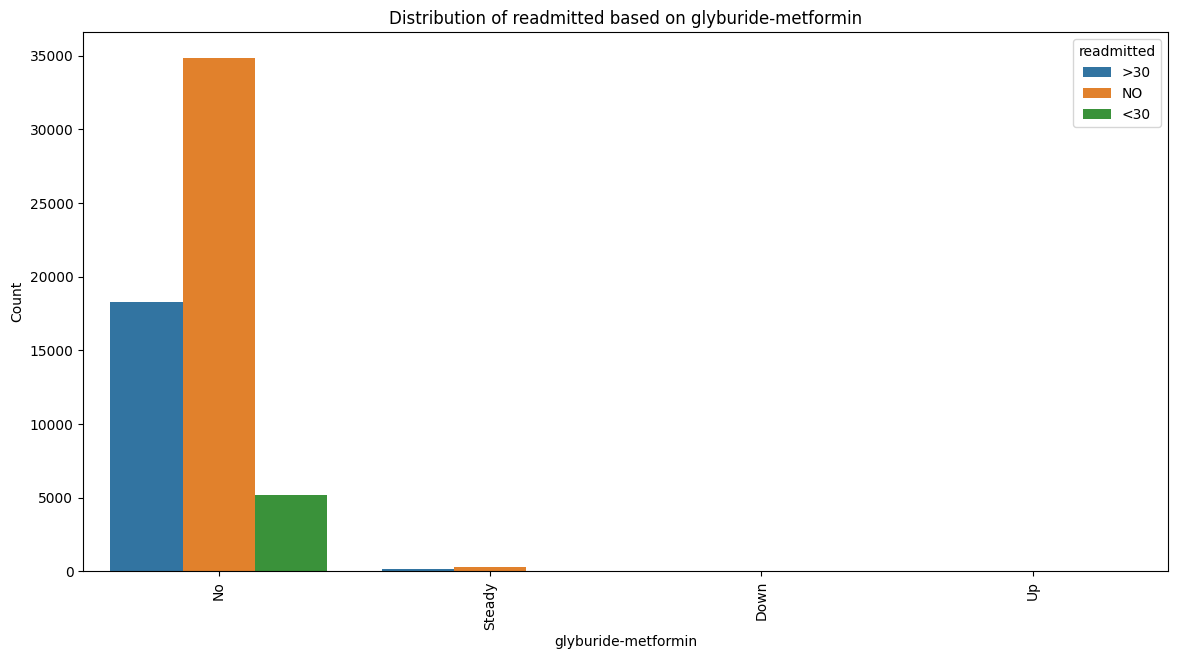

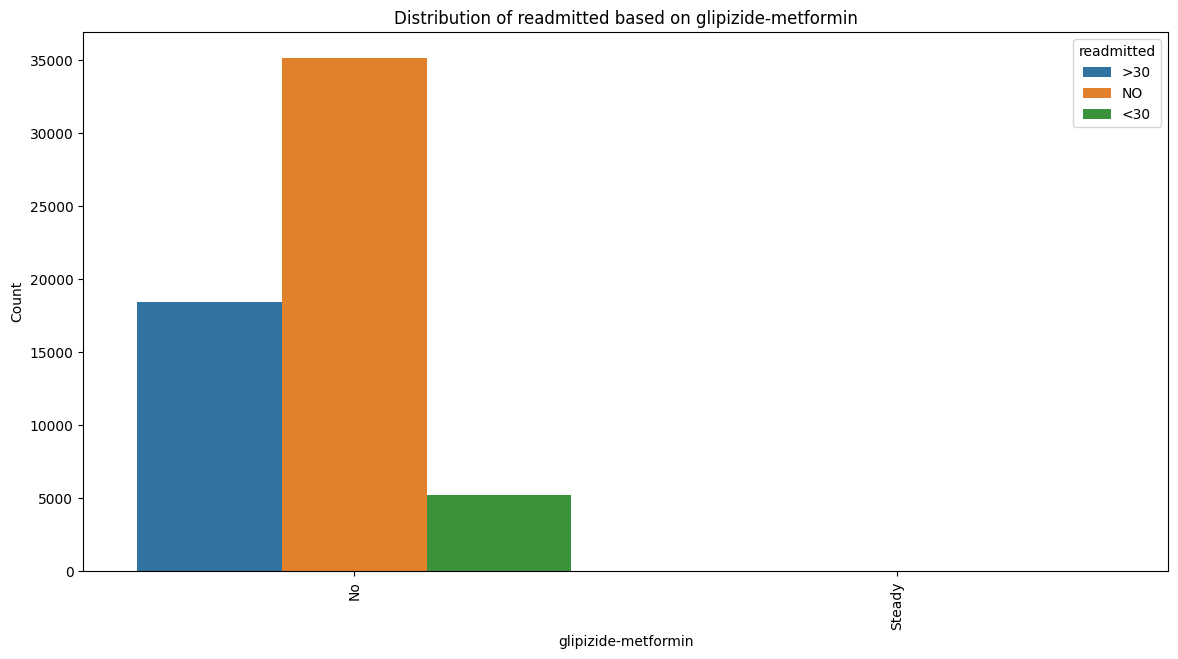

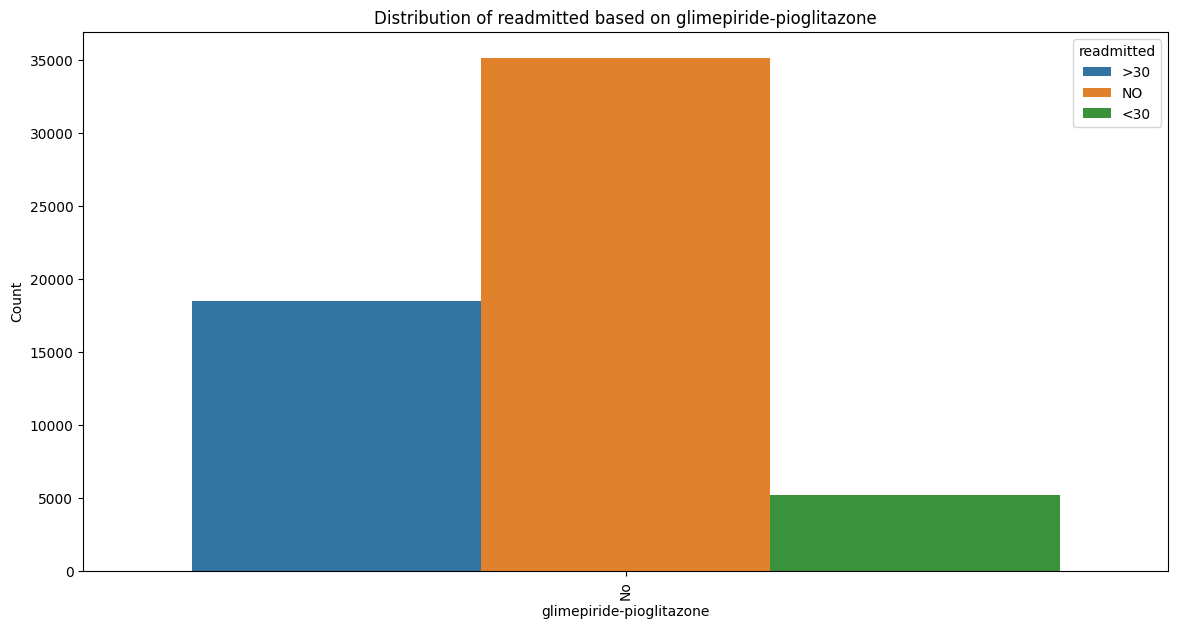

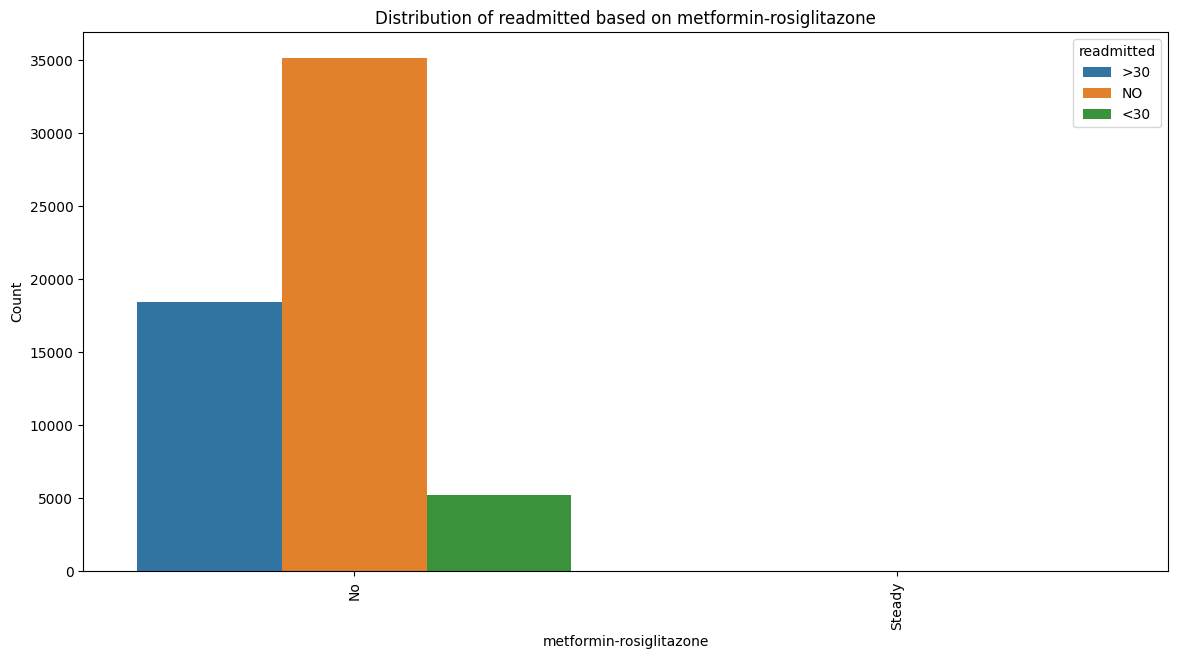

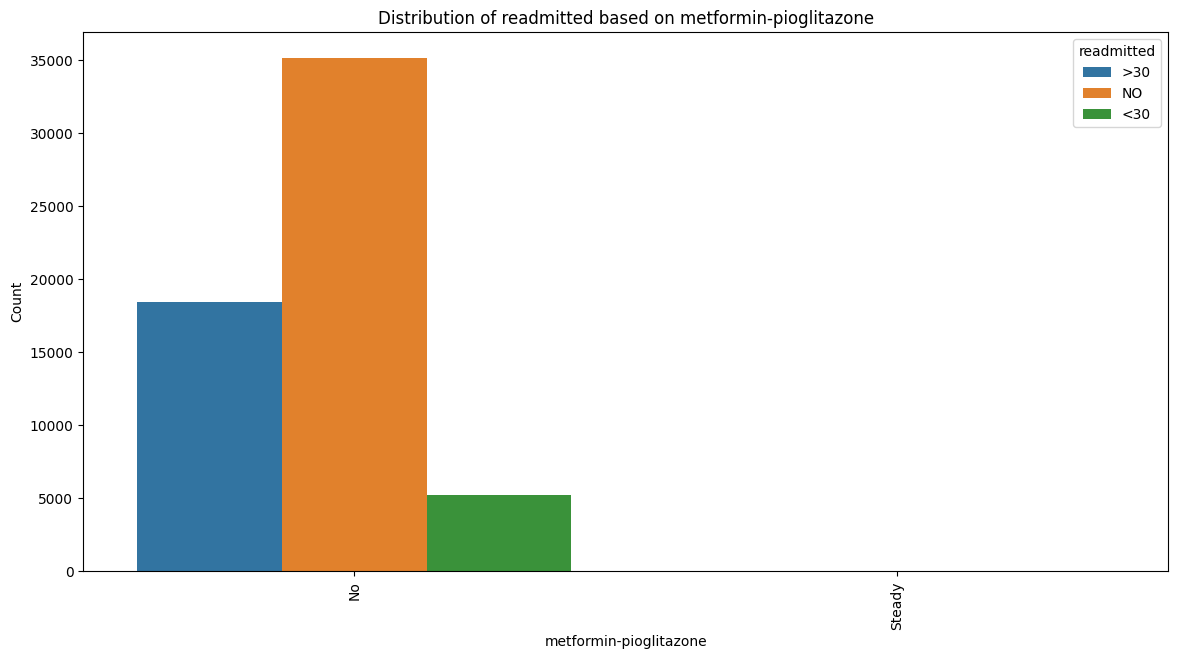

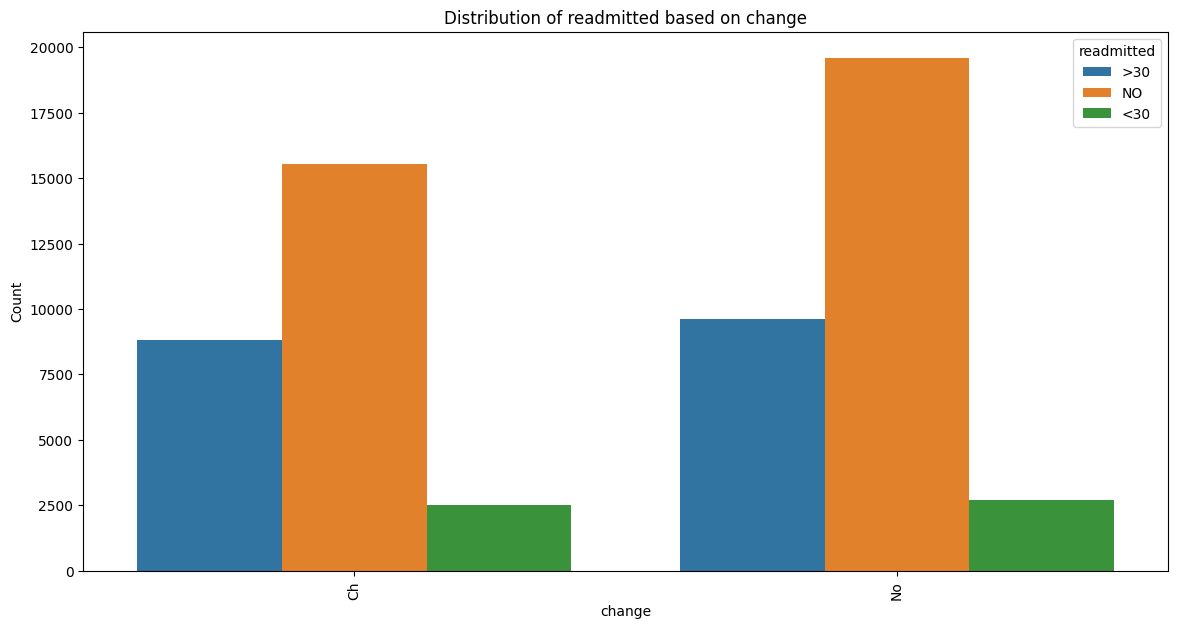

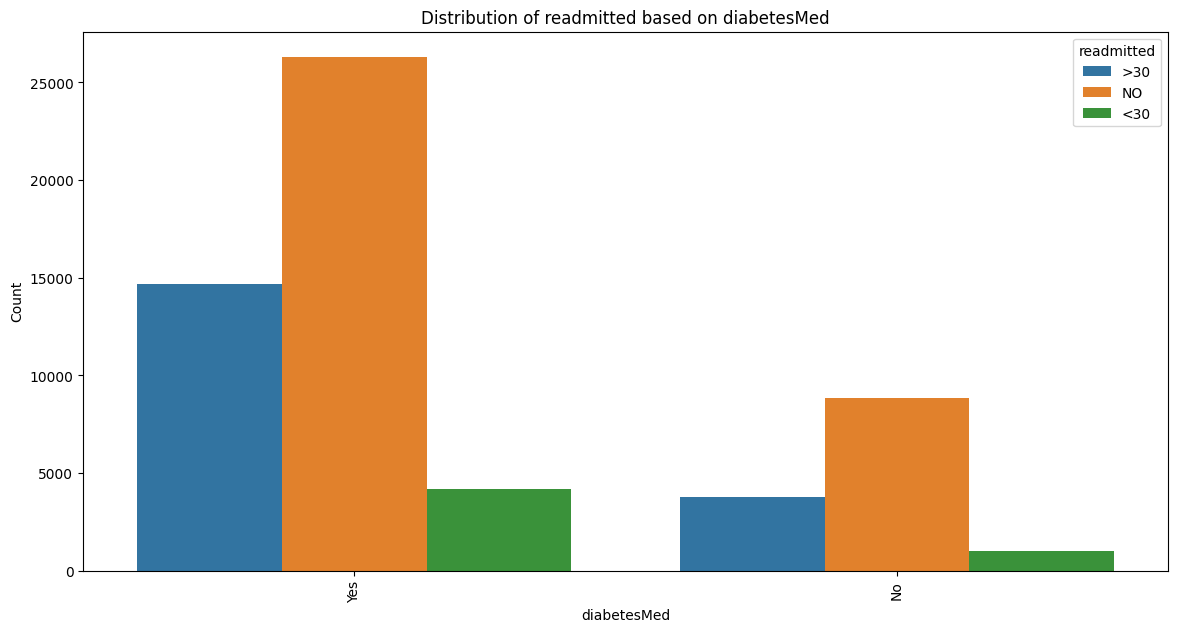

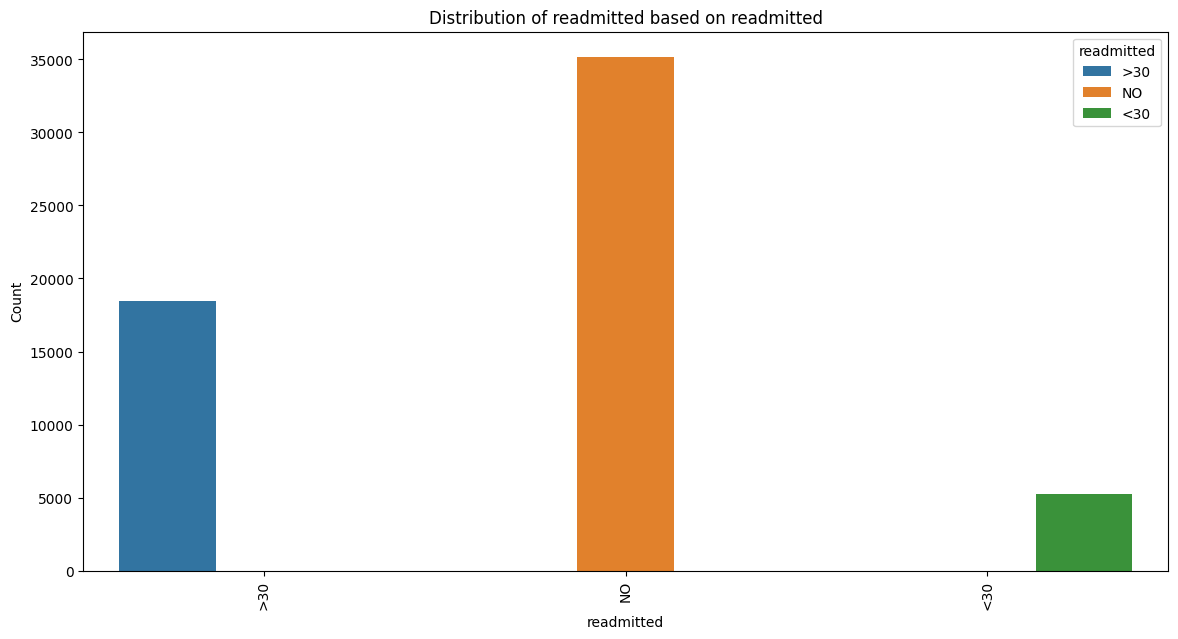

In [17]:
features = ['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
for feature in features:
    plt.figure(figsize=(14, 7))
    sns.countplot(x=feature, hue='readmitted', data=dataset)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of readmitted based on {feature}')
    plt.legend(title='readmitted', loc='upper right')
    plt.xticks(rotation=90)
    plt.show()

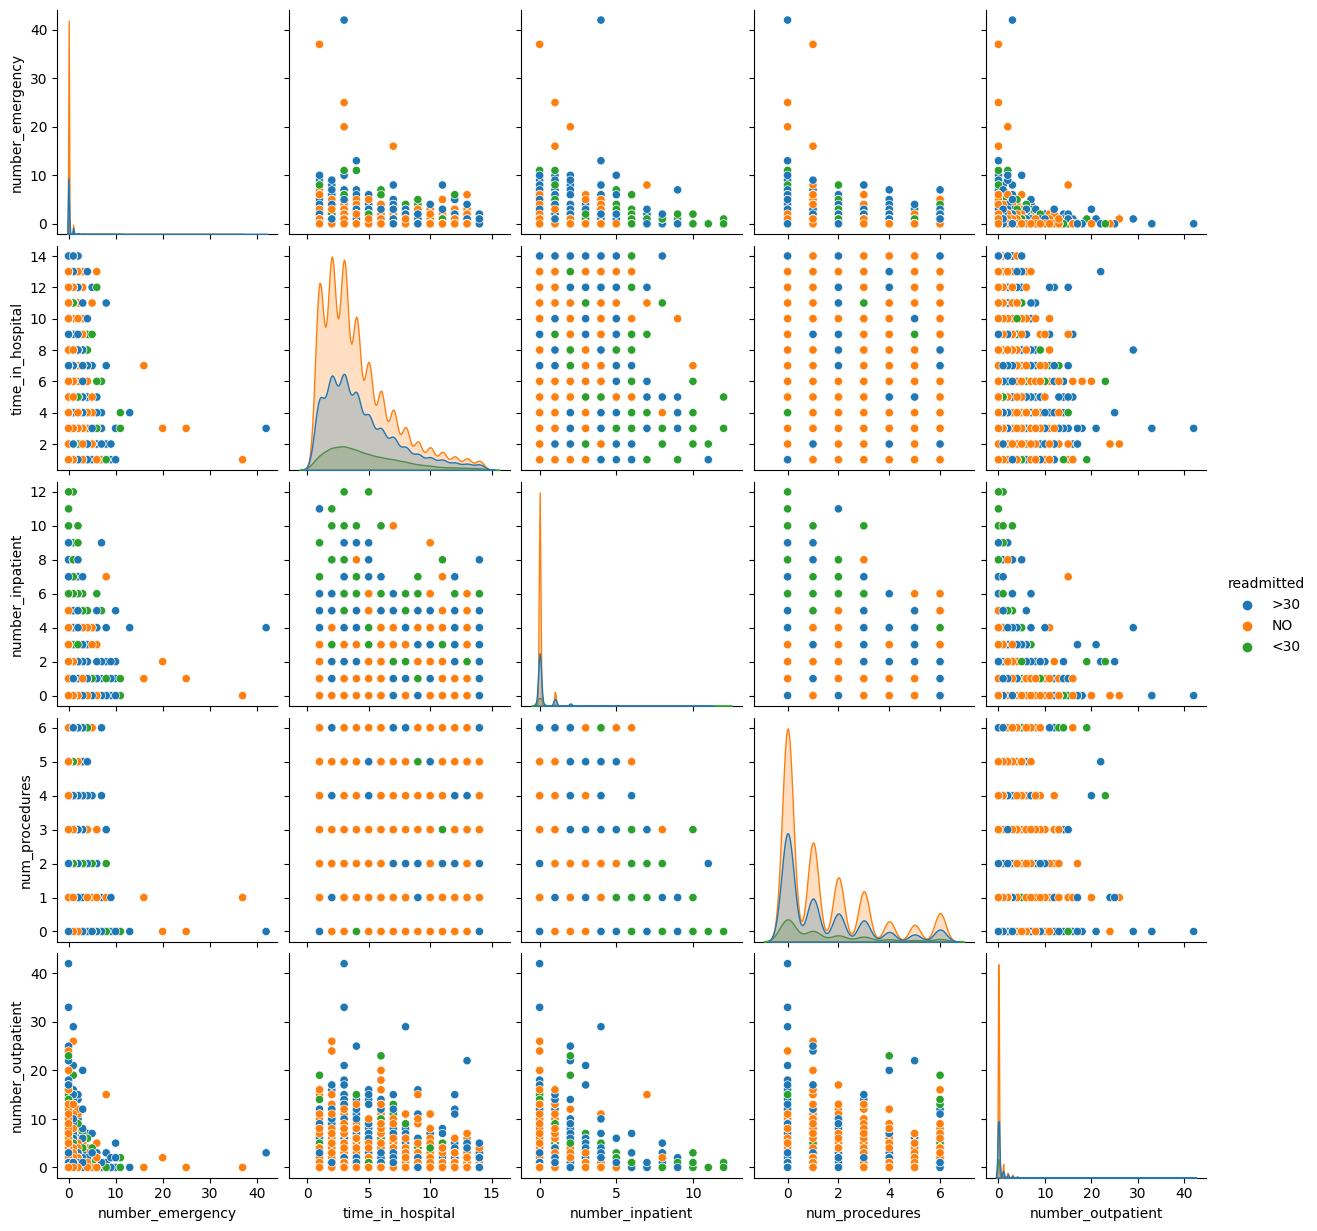

In [18]:
# pairplot of selected features
selected_features = ['number_emergency', 'time_in_hospital', 'number_inpatient', 'num_procedures','number_outpatient']
sns.pairplot(dataset, hue='readmitted', vars = selected_features)
plt.show()

<ipython-input-19-5cd7db6a5f1b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, square=True)


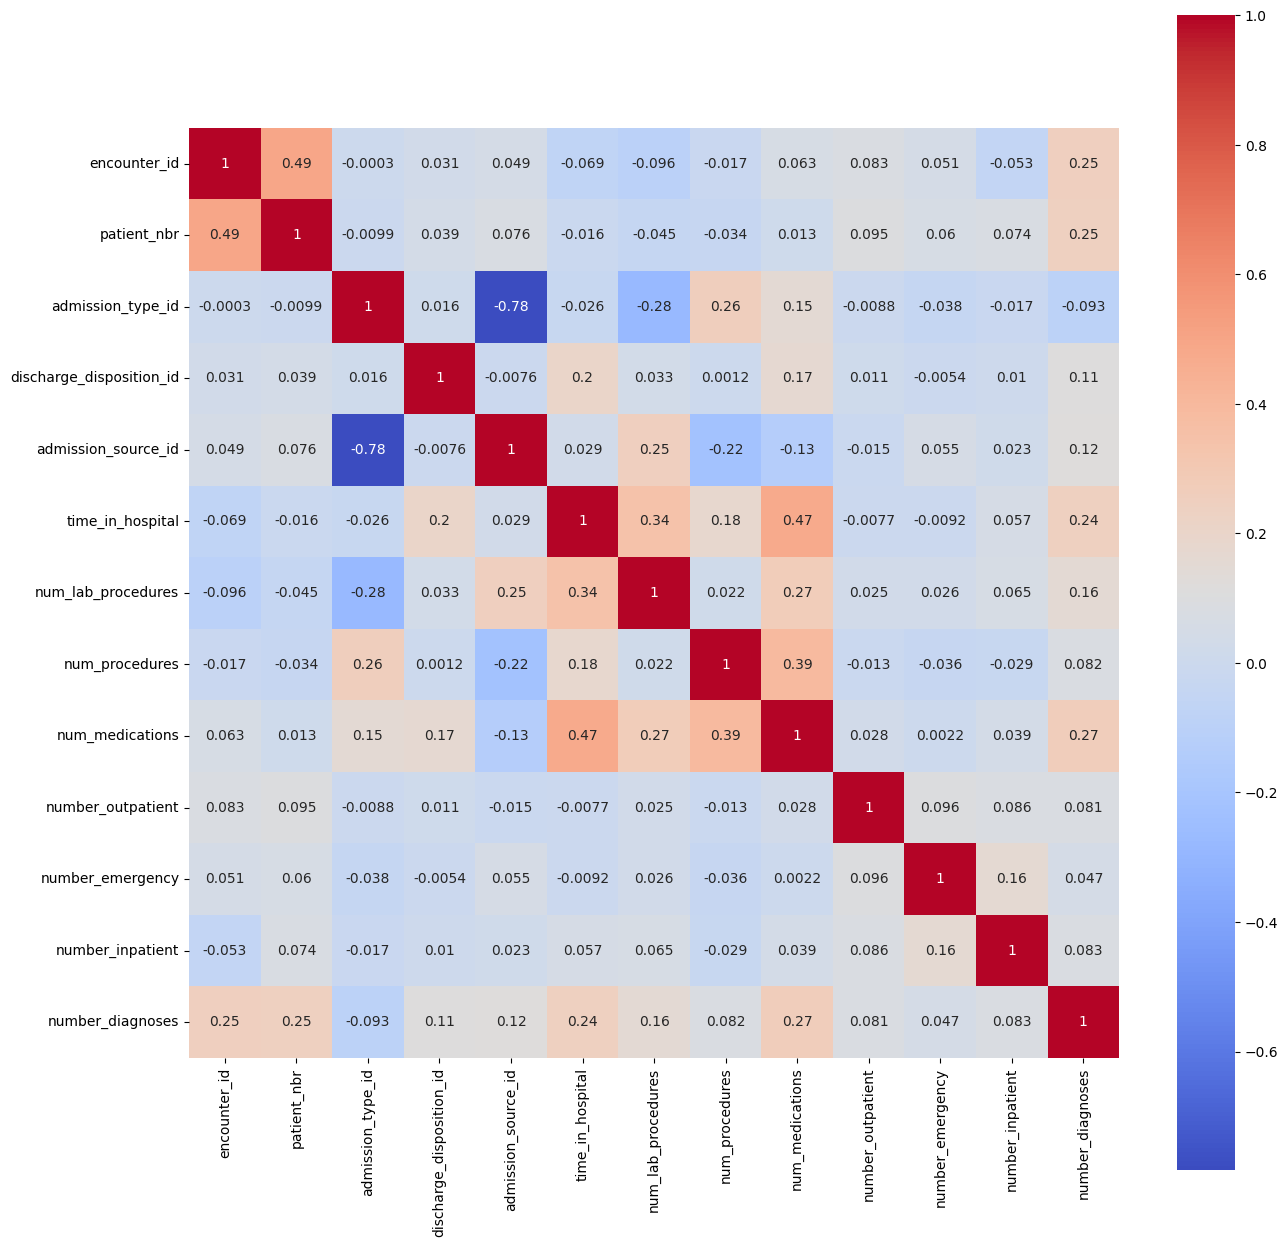

In [19]:
# visualize the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, square=True)
plt.show()

<Axes: xlabel='number_emergency', ylabel='time_in_hospital'>

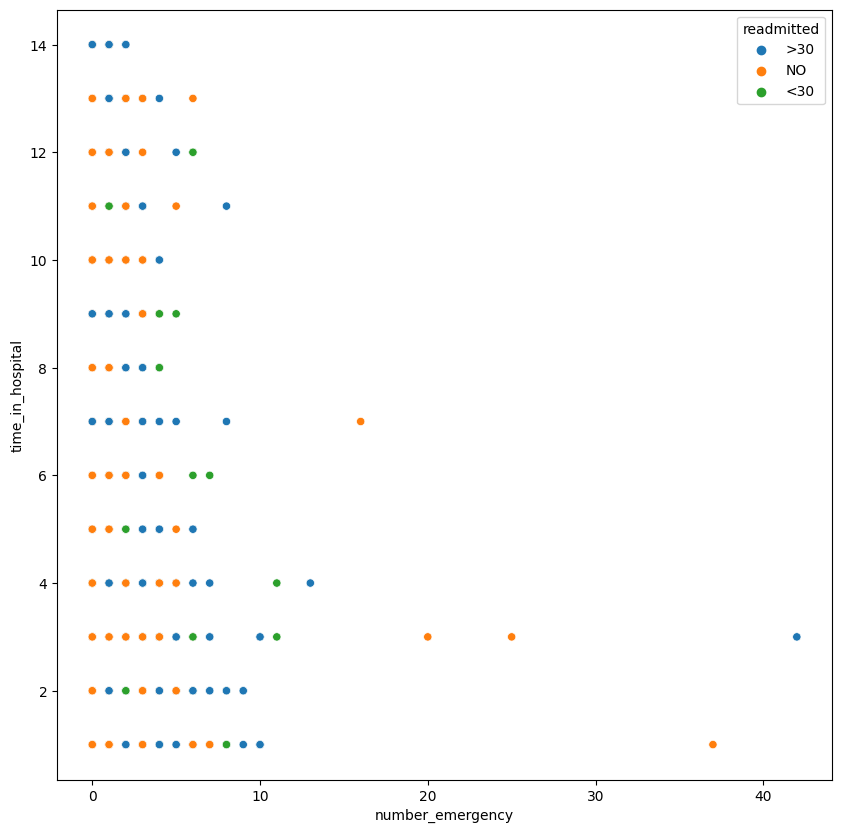

In [20]:
# scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x='number_emergency', y='time_in_hospital', hue='readmitted', data=dataset)

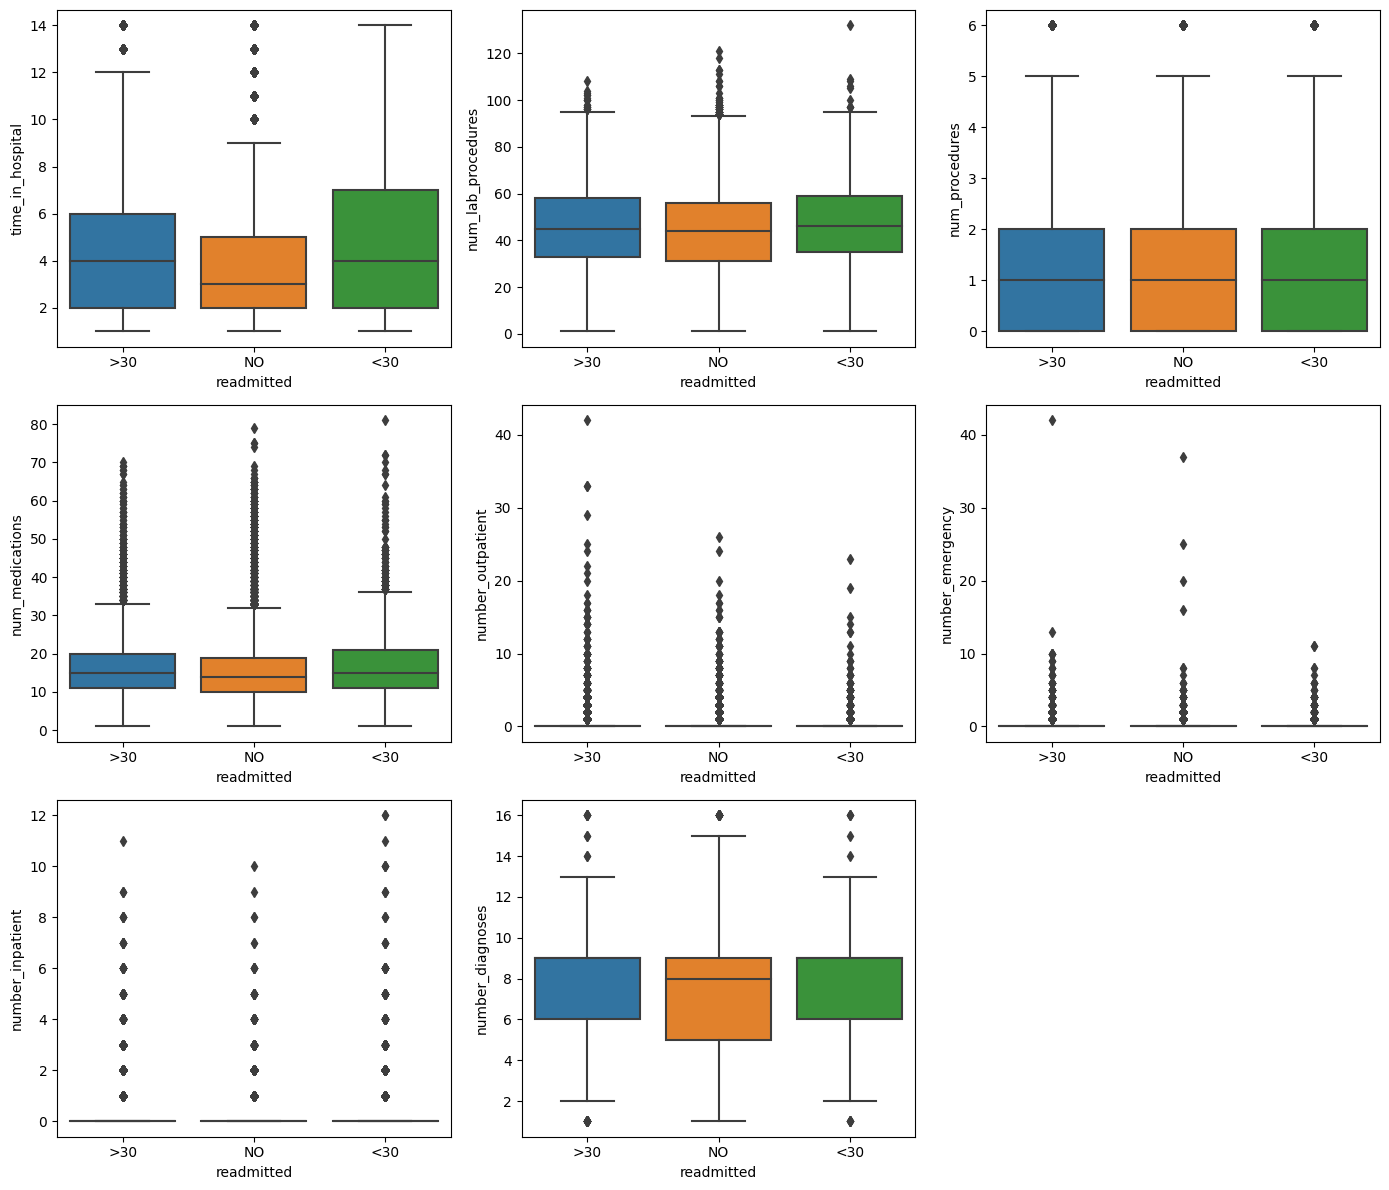

In [21]:
# Relationship between Features and Target Variable
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
plt.figure(figsize=(14, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=dataset['readmitted'], y=dataset[feature])
    plt.xlabel('readmitted')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

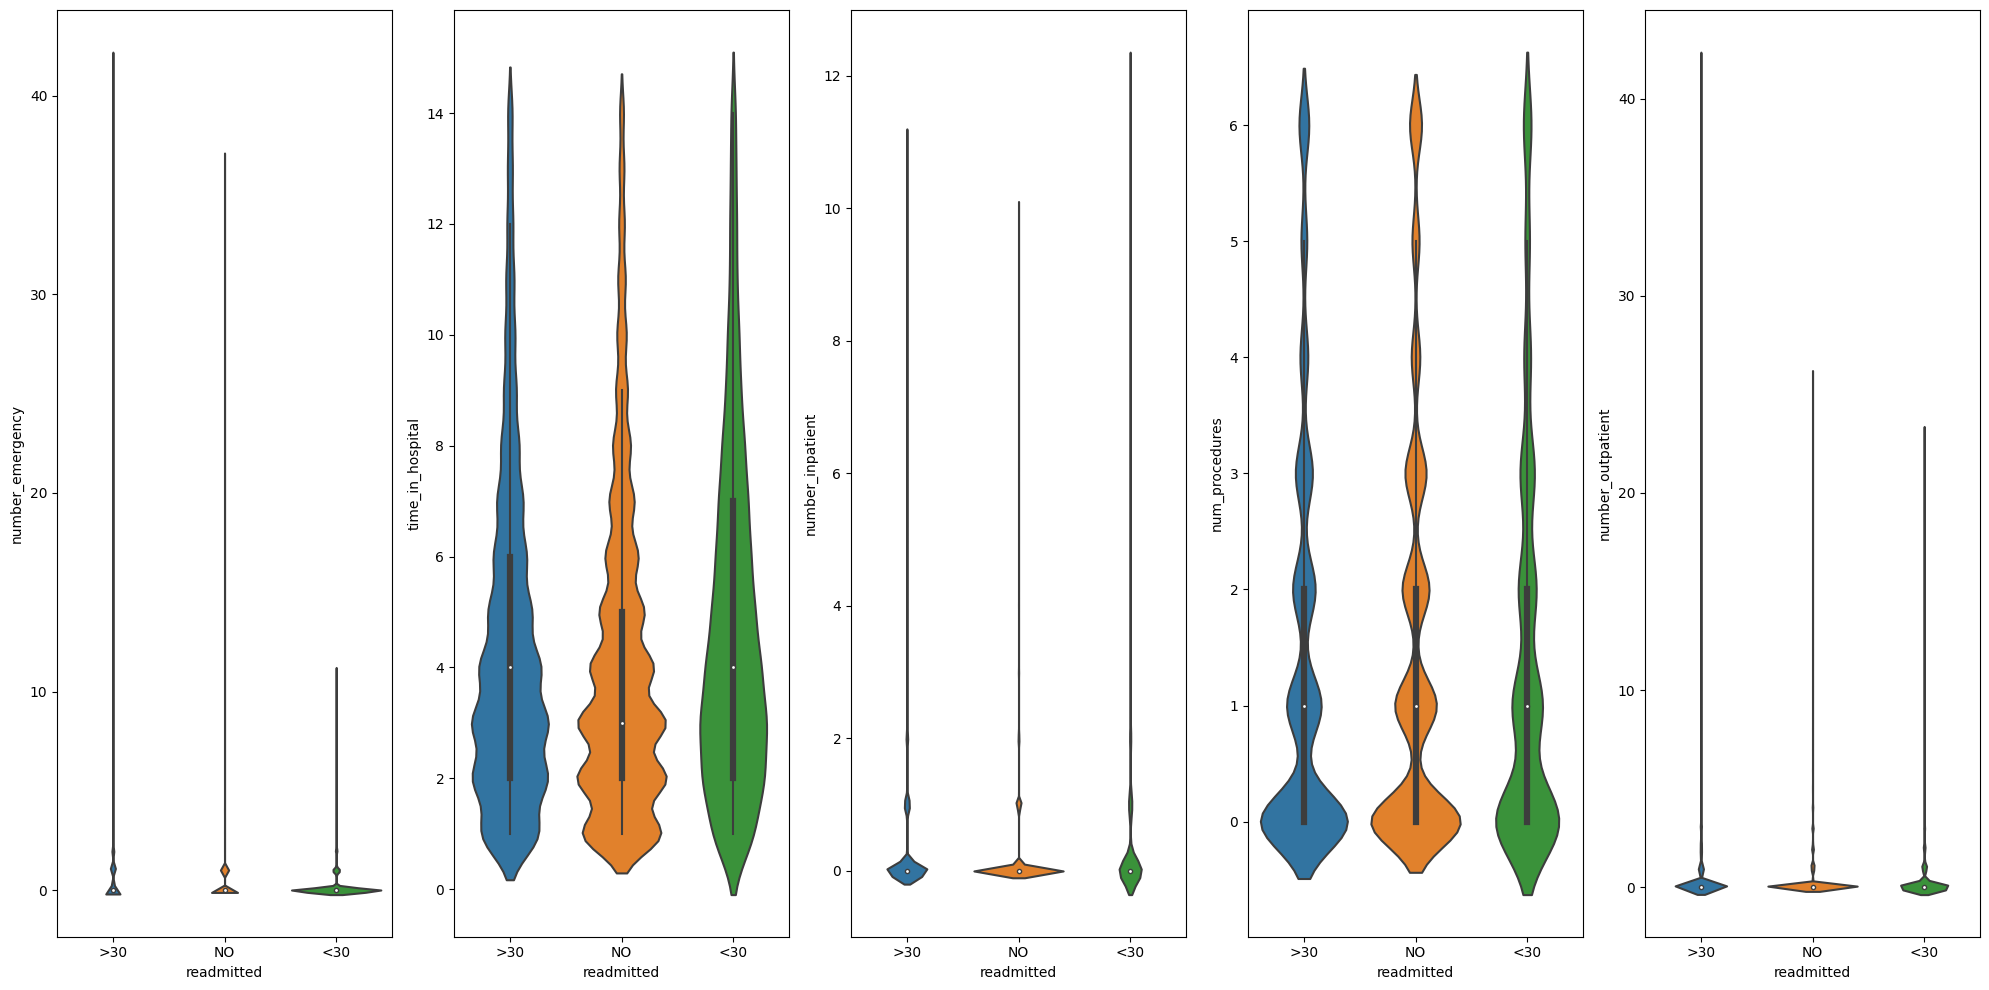

In [22]:
# Violin plots of selected features grouped by the target variable
plt.figure(figsize=(20, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    sns.violinplot(x="readmitted", y=feature, data=dataset)
plt.tight_layout()
plt.show()

In [23]:
# function to plot bar chart
def barchart_horizontal(column, labels, title, plot_name,a,b):
    feq=dataset.pivot_table(index=column, values='encounter_id', aggfunc='count')
    feq['Type']=labels
    feq.set_index('Type', inplace=True)
    feq=feq.sort_values(by='encounter_id', ascending=True)
    feq.plot.barh(figsize=(a,b),  width= 1)
    plt.xlabel('Number of patients', fontsize = 11)
    plt.ylabel('')
    plt.legend().set_visible(False)
    return plt.show()

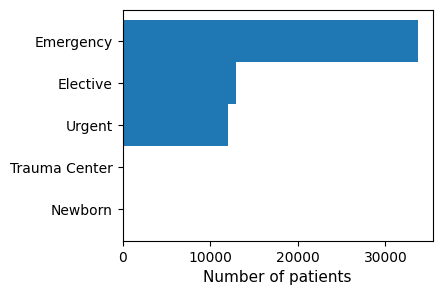

In [24]:
Admission_ty=['Emergency','Urgent','Elective','Newborn','Trauma Center']
barchart_horizontal('admission_type_id', Admission_ty, 'Admission Type Distribution', 'Admission_type.png',4,3)

In [25]:
# converting to emergency or not
dataset['admission_type'] = dataset['admission_type_id'].apply(lambda x: 1 if x > 1 else 0) # ID_Mapping: 1 = No Emergency
dataset.pivot_table(index='admission_type', values='admission_type_id', aggfunc='count')

admission_type_id
admission_type                   
0                           33702
1                           25108

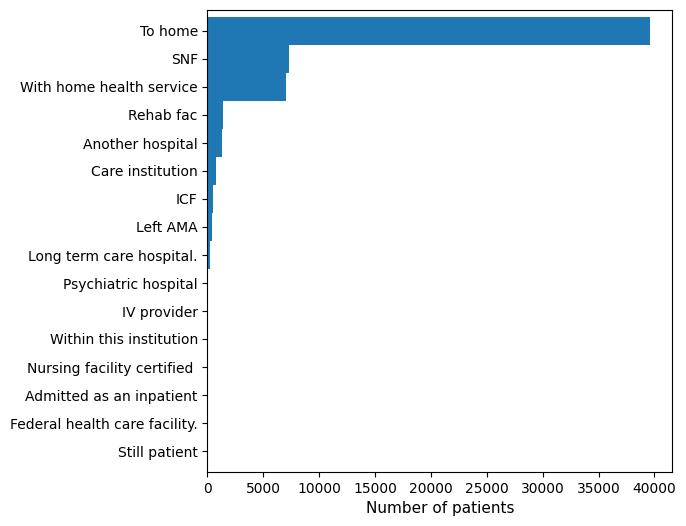

In [26]:
dispositions=['To home',
'Another hospital',
'SNF',
'ICF',
'Care institution',
'With home health service',
'Left AMA',
'IV provider',
'Admitted as an inpatient',
'Still patient',
'Within this institution',
'Rehab fac',
'Long term care hospital.',
'Nursing facility certified ',
'Federal health care facility.',
'Psychiatric hospital'
]

barchart_horizontal('discharge_disposition_id', dispositions,'Discharge Disposition Distribution', 'Discharge_Disposition.png',6,6)

In [27]:
dataset['Discharged_type'] = dataset['discharge_disposition_id'].apply(lambda x: 1 if x > 1 else 0) # ID_Mapping: 0 = Discharged to home
dataset.pivot_table(index='Discharged_type', values='encounter_id', aggfunc='count')

encounter_id
Discharged_type              
0                       39636
1                       19174

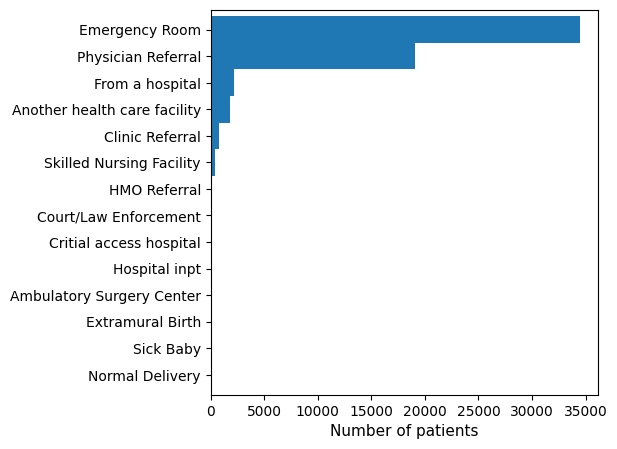

In [28]:
admission_source=[
    'Physician Referral',
    'Clinic Referral',
    'HMO Referral',
    'From a hospital',
    'Skilled Nursing Facility',
    'Another health care facility',
    'Emergency Room',
    'Court/Law Enforcement',
    'Critial access hospital',
    'Normal Delivery',
    'Sick Baby',
    'Extramural Birth',
    'Hospital inpt',
    'Ambulatory Surgery Center']

barchart_horizontal('admission_source_id', admission_source,'Admission Source Distribution', 'Admission_source.png',5,5)

In [29]:
# The admission type will be reduce in just two categories: Emergency room and No emergency room, where Emergency room = 1
dataset['Admision_source'] = dataset['admission_source_id'].apply(lambda x: 1 if x==7 else 0) # Emergency Room = 1

In [30]:
# removing the old ones
dataset=dataset.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1)
dataset.shape

(58810, 45)

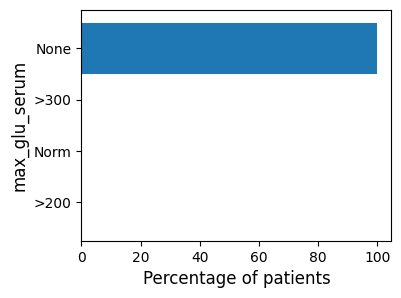

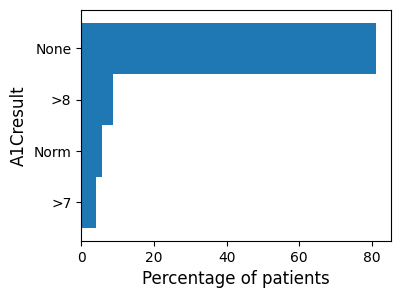

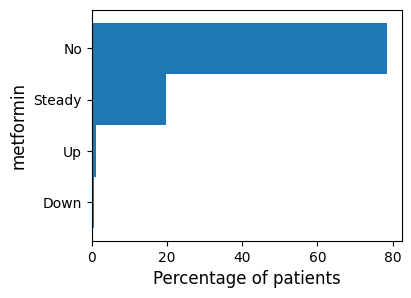

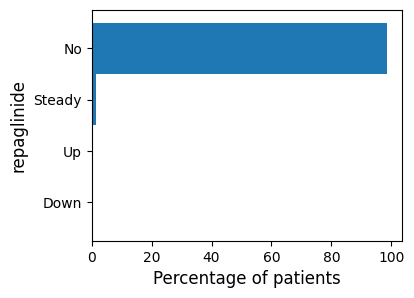

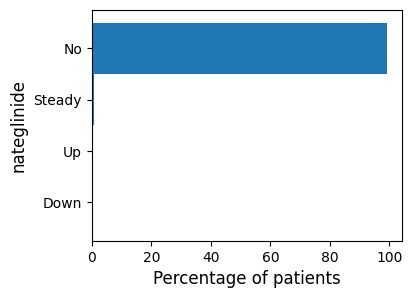

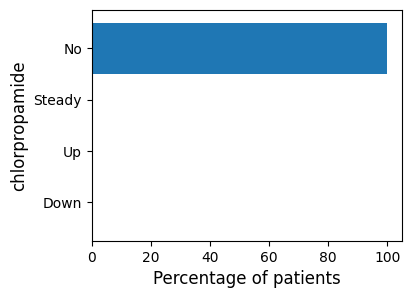

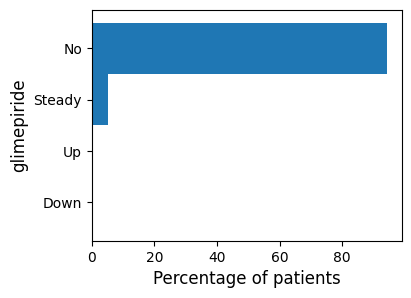

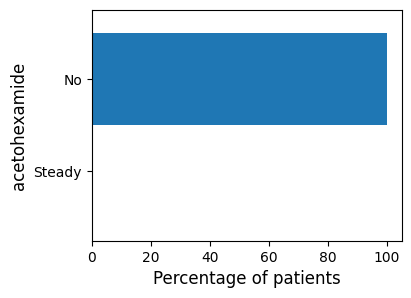

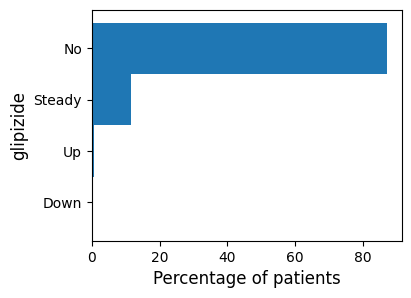

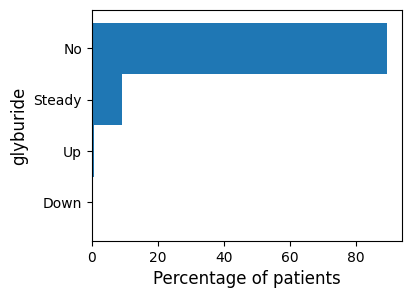

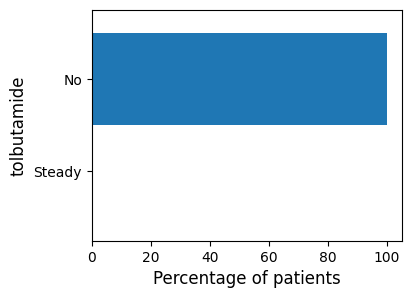

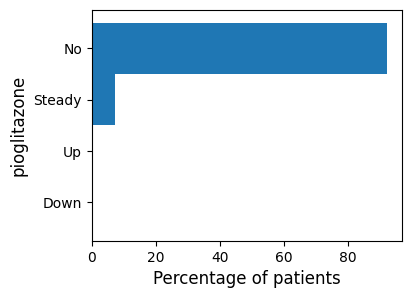

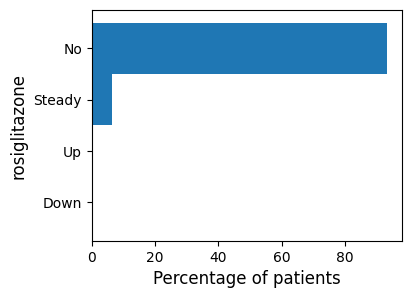

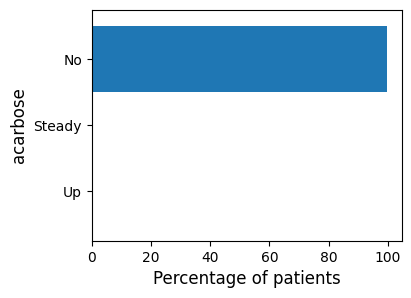

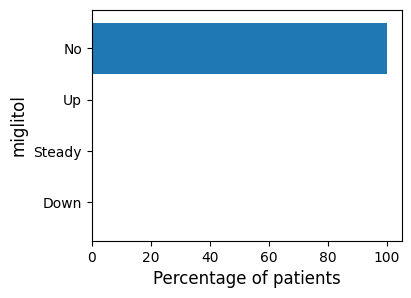

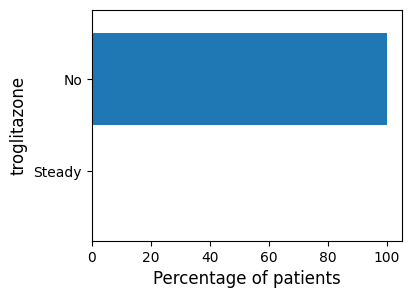

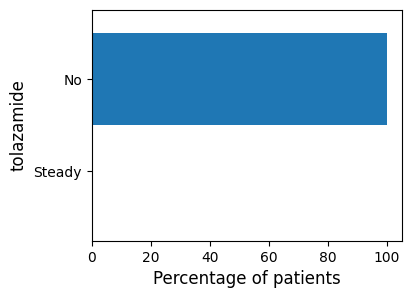

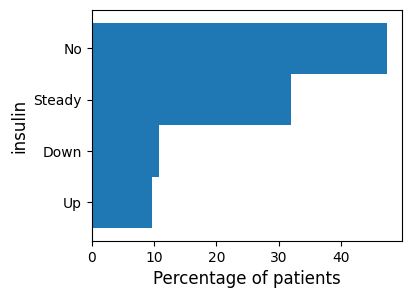

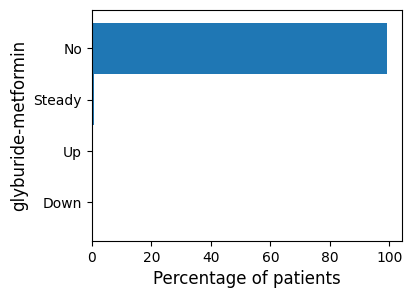

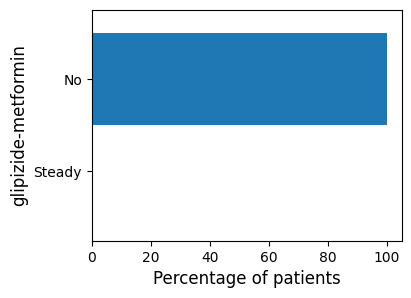

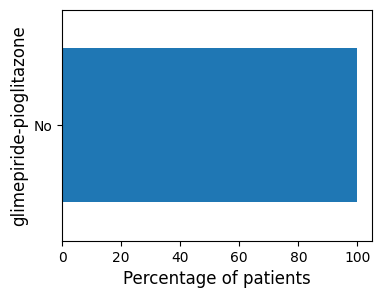

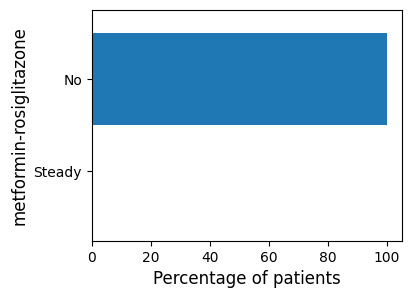

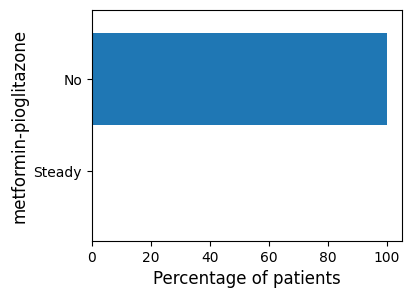

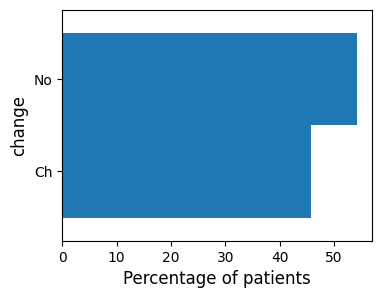

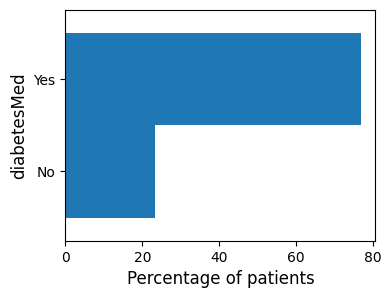

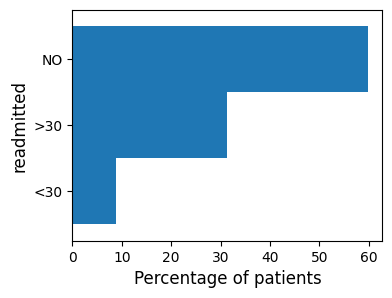

In [31]:
# bar chart for medical columns
medical=['max_glu_serum','A1Cresult','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
         'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone',
         'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'insulin',
         'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
         'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted' ]

for var in medical:

    pivot = dataset.pivot_table(index=[var], values=['encounter_id'], aggfunc='count', margins=False)
    pivot0=pivot.reset_index()
    pivot0['percentage']= np.round(100* (pivot0['encounter_id']/pivot0['encounter_id'].sum()),1)

    feq = pivot0[[var, 'percentage']].sort_values('percentage')
    feq=feq.set_index(var)
    feq.plot.barh(figsize=(4,3),  width= 1)
    plt.xlabel('Percentage of patients', fontsize = 12)
    plt.ylabel(var, fontsize = 12)
    plt.legend().set_visible(False)
    plt.show()

In [32]:
# The columns below will be removed since the majority of their values are associated with an unique class.

no_distr=['max_glu_serum','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
          'acetohexamide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
          'tolazamide','glyburide-metformin', 'glipizide-metformin',
          'glimepiride-pioglitazone', 'metformin-rosiglitazone',
          'metformin-pioglitazone' ]
dataset=dataset.drop(no_distr, axis=1)

In [33]:
print('After all of these changes in the columns, into the dataset remains ', len(dataset.columns), 'columns')

After all of these changes in the columns, into the dataset remains  27 columns


In [34]:
# removing invalid gender data
dataset=dataset[dataset['gender'].isin(['Female', 'Male' ])]

In [35]:
# replacing missing race values with race mode
race_mode = dataset['race'].mode()[0]
dataset['race'].replace('?', race_mode, inplace=True)

In [36]:
# encoding age
dataset.loc[dataset.age.str.contains('10|20|30'), 'age']='Less_fourty'
dataset.loc[dataset.age.str.contains('40|50'), 'age']='Between_fourty_sixty'
dataset.loc[dataset.age.str.contains('60'), 'age']='Between_sixty_seventy'
dataset.loc[dataset.age.str.contains('70|80|90'), 'age']='Greater_seventy'
dataset.pivot_table(index='age', values='encounter_id', aggfunc='count')

encounter_id
age                                
Between_fourty_sixty          16138
Between_sixty_seventy         13306
Greater_seventy               23974
Less_fourty                    5389

In [37]:
# readmitted percentage
func = lambda x: round(100*x.count()/dataset.shape[0],1)
readmitted_distribution=dataset.pivot_table(index='readmitted', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

% Total
readmitted         
<30             8.9
>30            31.4
NO             59.8
All           100.0

In [38]:
dataset['readmitted1'] = dataset.copy(deep = True)['readmitted']
dataset['readmitted1'] = dataset['readmitted1'].replace('>30', 1)
dataset['readmitted1'] = dataset['readmitted1'].replace('<30', 2)
dataset['readmitted1'] = dataset['readmitted1'].replace('NO', 0)

readmitted_distribution=dataset.pivot_table(index='readmitted1', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

% Total
readmitted1         
0               59.8
1               31.4
2                8.9
All            100.0

In [39]:
dataset['readmitted2'] = dataset.copy(deep = True)['readmitted']
dataset['readmitted2'] = dataset['readmitted2'].replace('>30', 1)
dataset['readmitted2'] = dataset['readmitted2'].replace('<30', 1)
dataset['readmitted2'] = dataset['readmitted2'].replace('NO', 0)

readmitted_distribution=dataset.pivot_table(index='readmitted2', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

% Total
readmitted2         
0               59.8
1               40.2
All            100.0

In [40]:
dataset['readmitted3'] = dataset.copy(deep = True)['readmitted']
dataset['readmitted3'] = dataset['readmitted3'].replace('>30', 0)
dataset['readmitted3'] = dataset['readmitted3'].replace('<30', 1)
dataset['readmitted3'] = dataset['readmitted3'].replace('NO', 0)

readmitted_distribution=dataset.pivot_table(index='readmitted3', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

% Total
readmitted3         
0               91.1
1                8.9
All            100.0

In [41]:
# encoding diag
dataset.loc[dataset['diag_1'].str.contains('V'), 'diag_1'] = '1'
dataset.loc[dataset['diag_1'].str.contains('E'), 'diag_1'] = '1'
dataset['diag_1'].replace('?', -1, inplace=True)
dataset['diag_1']=dataset['diag_1'].astype(float)
dataset['diag_type'] = dataset['diag_1'].apply(lambda x: 'Diabetes' if x>=250 and x<= 251
                                               else 'Other' if x==1
                                               else 'Circulatory' if x>=390 and x<=459 or x==785
                                               else 'Respiratory' if x>=460 and x<=519 or x==786
                                               else 'Digestive' if x>=520 and x<=579 or x==787
                                               else 'Genitourinary' if x>=580 and x<=629 or x==788
                                               else 'Neoplasms' if x>=140 and x<=239
                                               else 'Musculoskeletal' if x>=710 and x<=739
                                               else 'Injury' if x>=800 and x<=999
                                               else 'Other')

In [42]:
pd.set_option("display.max_rows", 700)
dataset.pivot_table(index=['diag_type'], values='encounter_id', aggfunc='count')

encounter_id
diag_type                    
Circulatory             17929
Diabetes                 4911
Digestive                5433
Genitourinary            2965
Injury                   4012
Musculoskeletal          3330
Neoplasms                2169
Other                   10191
Respiratory              7867

In [43]:
dataset.loc[dataset['diag_2'].str.contains('V'), 'diag_2'] = '1'
dataset.loc[dataset['diag_2'].str.contains('E'), 'diag_2'] = '1'
dataset['diag_2'].replace('?', -1, inplace=True)
dataset['diag_2']=dataset['diag_2'].astype(float)
dataset['diag_type2'] = dataset['diag_2'].apply(lambda x: 'Diabetes' if x>=250 and x<= 251
                                               else 'Other' if x==1
                                               else 'Circulatory' if x>=390 and x<=459 or x==785
                                               else 'Respiratory' if x>=460 and x<=519 or x==786
                                               else 'Digestive' if x>=520 and x<=579 or x==787
                                               else 'Genitourinary' if x>=580 and x<=629 or x==788
                                               else 'Neoplasms' if x>=140 and x<=239
                                               else 'Musculoskeletal' if x>=710 and x<=739
                                               else 'Injury' if x>=800 and x<=999
                                               else 'Other')

In [44]:
pd.set_option("display.max_rows", 700)
dataset.pivot_table(index=['diag_type2'], values='encounter_id', aggfunc='count')

encounter_id
diag_type2                   
Circulatory             18372
Diabetes                 7922
Digestive                2379
Genitourinary            4635
Injury                   1563
Musculoskeletal          1082
Neoplasms                1362
Other                   15669
Respiratory              5823

In [45]:
dataset.loc[dataset['diag_3'].str.contains('V'), 'diag_3'] = '1'
dataset.loc[dataset['diag_3'].str.contains('E'), 'diag_3'] = '1'
dataset['diag_3'].replace('?', -1, inplace=True)
dataset['diag_3']=dataset['diag_3'].astype(float)
dataset['diag_type3'] = dataset['diag_3'].apply(lambda x: 'Diabetes' if x>=250 and x<= 251
                                               else 'Other' if x==1
                                               else 'Circulatory' if x>=390 and x<=459 or x==785
                                               else 'Respiratory' if x>=460 and x<=519 or x==786
                                               else 'Digestive' if x>=520 and x<=579 or x==787
                                               else 'Genitourinary' if x>=580 and x<=629 or x==788
                                               else 'Neoplasms' if x>=140 and x<=239
                                               else 'Musculoskeletal' if x>=710 and x<=739
                                               else 'Injury' if x>=800 and x<=999
                                               else 'Other')

In [46]:
pd.set_option("display.max_rows", 700)
dataset.pivot_table(index=['diag_type3'], values='encounter_id', aggfunc='count')

encounter_id
diag_type3                   
Circulatory             17544
Diabetes                10327
Digestive                2221
Genitourinary            3464
Injury                   1200
Musculoskeletal          1151
Neoplasms                 989
Other                   18006
Respiratory              3905

In [47]:
# finding unique values
categorias_revisar = ['diabetesMed', 'change', 'insulin', 'A1Cresult', 'metformin', 'glipizide', 'glyburide']
for var in categorias_revisar:
    print(var, dataset[var].unique())

diabetesMed ['Yes' 'No']
change ['Ch' 'No']
insulin ['Up' 'No' 'Steady' 'Down']
A1Cresult ['None' '>7' '>8' 'Norm']
metformin ['No' 'Steady' 'Up' 'Down']
glipizide ['No' 'Steady' 'Down' 'Up']
glyburide ['No' 'Steady' 'Up' 'Down']


In [48]:
# making values 0 or 1
for var in ['diabetesMed']:
    dataset.loc[dataset[var].str.contains('Yes'), var] = '1'
    dataset.loc[dataset[var].str.contains('No'), var] = '0'
    dataset[var]=dataset[var].astype('int64')

In [49]:
# making values 0 or 1
dataset.loc[dataset['change'].str.contains('Ch'), 'change'] = '1'
dataset.loc[dataset['change'].str.contains('No'), 'change'] = '0'
dataset['change']=dataset['change'].astype('int64')

In [50]:
# one hot encoding
dummies_creation=['race','gender','insulin','age', 'A1Cresult', 'diag_type', 'diag_type2', 'diag_type3','metformin', 'glipizide', 'glyburide']
for var in dummies_creation:
    dataset=pd.concat([dataset, pd.get_dummies(dataset[var], prefix=var)], axis=1)

In [51]:
dataset.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'admission_type', 'Discharged_type',
       'Admision_source', 'readmitted1', 'readmitted2', 'readmitted3',
       'diag_type', 'diag_type2', 'diag_type3', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_Female', 'gender_Male', 'insulin_Down', 'insulin_No',
       'insulin_Steady', 'insulin_Up', 'age_Between_fourty_sixty',
       'age_Between_sixty_seventy', 'age_Greater_seventy', 'age_Less_fourty',
       'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'diag_type_Circulatory', 'diag_type_Diabetes', 'diag_type_Digest

In [52]:
dataset=dataset.drop(dummies_creation+['diag_1', 'diag_2', 'diag_3', 'race', 'gender', 'age', 'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin'], axis=1)

In [53]:
dataset.shape

(58807, 77)

In [54]:
# libriaries for classification

import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, accuracy_score,  classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_regression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from collections import Counter

from __future__ import absolute_import, division, print_function, unicode_literals
from yellowbrick.model_selection import FeatureImportances

In [55]:
X = dataset.drop(['encounter_id', 'patient_nbr', 'gender_Female','readmitted','readmitted1','readmitted2','readmitted3'] , axis=1)
y1=dataset['readmitted1']
y2=dataset['readmitted2']
y3=dataset['readmitted3']

In [56]:
len(X.columns)

70

In [57]:
X.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed',
       'admission_type', 'Discharged_type', 'Admision_source',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Male', 'insulin_Down', 'insulin_No',
       'insulin_Steady', 'insulin_Up', 'age_Between_fourty_sixty',
       'age_Between_sixty_seventy', 'age_Greater_seventy', 'age_Less_fourty',
       'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'diag_type_Circulatory', 'diag_type_Diabetes', 'diag_type_Digestive',
       'diag_type_Genitourinary', 'diag_type_Injury',
       'diag_type_Musculoskeletal', 'diag_type_Neoplasms', 'diag_type_Other',
       'diag_type_Respiratory', 'diag_type2_Circulatory',
       'diag_type2_Diabetes', 'diag_type2_Digestive',
       'diag_type2_Genitourinary', 'diag_typ

In [58]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1,
                                                    test_size=0.3,

                                                    random_state=0)

print('Training samples: {}'.format(X_train1.shape[0]))
print('Testing samples: {}'.format(X_test1.shape[0]))
print('Number of features: {}'.format(X_train1.shape[1]))
print('Training outcome distribution: {}'.format(np.bincount(y_train1)))
print('Testing outcome distribution: {}'.format(np.bincount(y_test1)))

Training samples: 41164
Testing samples: 17643
Number of features: 70
Training outcome distribution: [24582 12933  3649]
Testing outcome distribution: [10562  5509  1572]


In [59]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2,
                                                    test_size=0.3,

                                                    random_state=0)

print('Training samples: {}'.format(X_train2.shape[0]))
print('Testing samples: {}'.format(X_test2.shape[0]))
print('Number of features: {}'.format(X_train2.shape[1]))
print('Training outcome distribution: {}'.format(np.bincount(y_train2)))
print('Testing outcome distribution: {}'.format(np.bincount(y_test2)))

Training samples: 41164
Testing samples: 17643
Number of features: 70
Training outcome distribution: [24582 16582]
Testing outcome distribution: [10562  7081]


In [60]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3,
                                                    test_size=0.3,

                                                    random_state=0)

print('Training samples: {}'.format(X_train3.shape[0]))
print('Testing samples: {}'.format(X_test3.shape[0]))
print('Number of features: {}'.format(X_train3.shape[1]))
print('Training outcome distribution: {}'.format(np.bincount(y_train3)))
print('Testing outcome distribution: {}'.format(np.bincount(y_test3)))

Training samples: 41164
Testing samples: 17643
Number of features: 70
Training outcome distribution: [37515  3649]
Testing outcome distribution: [16071  1572]


In [61]:
sm=SMOTE(random_state=2)
X_res1, y_res1=sm.fit_resample(X_train1,y_train1.ravel())
print('Original train dataset shape %s' % Counter(y_train1))
print('Resampled train dataset shape %s' % Counter(y_res1))

Original train dataset shape Counter({0: 24582, 1: 12933, 2: 3649})
Resampled train dataset shape Counter({0: 24582, 2: 24582, 1: 24582})


In [62]:
X_res2, y_res2=sm.fit_resample(X_train2,y_train2)
print('Original train dataset shape %s' % Counter(y_train2))
print('Resampled train dataset shape %s' % Counter(y_res2))

Original train dataset shape Counter({0: 24582, 1: 16582})
Resampled train dataset shape Counter({0: 24582, 1: 24582})


In [63]:
X_res3, y_res3=sm.fit_resample(X_train3,y_train3)
print('Original train dataset shape %s' % Counter(y_train3))
print('Resampled train dataset shape %s' % Counter(y_res3))

Original train dataset shape Counter({0: 37515, 1: 3649})
Resampled train dataset shape Counter({0: 37515, 1: 37515})


In [64]:
classifier = LogisticRegression(max_iter=10000,random_state=0, class_weight='balanced', solver='newton-cg',n_jobs=-1)
lrclf = classifier.fit(X_res2, y_res2)
y_pred = classifier.predict(X_test2)
print("Classification report for classifier %s:\n%s\n"
      % (lrclf, classification_report(y_test2, y_pred)))

Classification report for classifier LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1,
                   random_state=0, solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.64      0.88      0.74     10562
           1       0.59      0.25      0.35      7081

    accuracy                           0.63     17643
   macro avg       0.62      0.57      0.55     17643
weighted avg       0.62      0.63      0.59     17643




In [65]:
classifier = LogisticRegression(max_iter=10000,random_state=0, class_weight='balanced', solver='newton-cg',n_jobs=-1)
lrclf = classifier.fit(X_res3, y_res3)
y_pred = classifier.predict(X_test3)
print("Classification report for classifier %s:\n%s\n"
      % (lrclf, classification_report(y_test3, y_pred)))

Classification report for classifier LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1,
                   random_state=0, solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16071
           1       0.38      0.00      0.00      1572

    accuracy                           0.91     17643
   macro avg       0.64      0.50      0.48     17643
weighted avg       0.86      0.91      0.87     17643




In [66]:
classifier = LogisticRegression(max_iter=10000,random_state=0, class_weight='balanced', solver='newton-cg',n_jobs=-1)
lrclf = classifier.fit(X_res1, y_res1)
y_pred = classifier.predict(X_test1)
print("Classification report for classifier %s:\n%s\n"
      % (lrclf, classification_report(y_test1, y_pred)))

Classification report for classifier LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1,
                   random_state=0, solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.62      0.95      0.75     10562
           1       0.50      0.12      0.19      5509
           2       0.32      0.01      0.01      1572

    accuracy                           0.61     17643
   macro avg       0.48      0.36      0.32     17643
weighted avg       0.55      0.61      0.51     17643




In [67]:
clf=RandomForestClassifier(criterion='entropy', max_depth=32,random_state=0, n_jobs=-1)
rfclf = clf.fit(X_res2,y_res2)
y_pred=clf.predict(X_test2)
print("Classification report for classifier %s:\n%s\n"
      % (rfclf, classification_report(y_test2, y_pred)))

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=32, n_jobs=-1,
                       random_state=0):
              precision    recall  f1-score   support

           0       0.65      0.76      0.70     10562
           1       0.51      0.38      0.43      7081

    accuracy                           0.61     17643
   macro avg       0.58      0.57      0.57     17643
weighted avg       0.59      0.61      0.59     17643




In [68]:
clf=RandomForestClassifier(criterion='entropy', max_depth=32,random_state=0, n_jobs=-1)
rfclf = clf.fit(X_res3,y_res3)
y_pred=clf.predict(X_test3)
print("Classification report for classifier %s:\n%s\n"
      % (rfclf, classification_report(y_test3, y_pred)))

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=32, n_jobs=-1,
                       random_state=0):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16071
           1       0.00      0.00      0.00      1572

    accuracy                           0.91     17643
   macro avg       0.46      0.50      0.48     17643
weighted avg       0.83      0.91      0.87     17643




In [69]:
clf=RandomForestClassifier(criterion='entropy', max_depth=32,random_state=0, n_jobs=-1)
rfclf = clf.fit(X_res1,y_res1)
y_pred=clf.predict(X_test1)
print("Classification report for classifier %s:\n%s\n"
      % (rfclf, classification_report(y_test1, y_pred)))

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=32, n_jobs=-1,
                       random_state=0):
              precision    recall  f1-score   support

           0       0.62      0.87      0.72     10562
           1       0.41      0.20      0.27      5509
           2       0.12      0.01      0.01      1572

    accuracy                           0.58     17643
   macro avg       0.38      0.36      0.33     17643
weighted avg       0.51      0.58      0.52     17643




In [70]:
xgb_classifier = xgb.XGBClassifier(random_state=0,n_jobs=-1,n_estimators=400,eta = 0.15, min_child_weight = 2, max_depth = 5)
xgbclf=xgb_classifier.fit(X_res2, y_res2)
y_pred=xgb_classifier.predict(X_test2)
print("Classification report for classifier %s:\n%s\n"
      % (xgbclf, classification_report(y_test2, y_pred)))

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, predictor=None, ...):
              precision    recall  f1-score   support

           0       0.65      0.80      0.72     10562
           1       0.55      0.36      0.44      7081

    accuracy                           0.62     17643
   macro 

In [71]:
xgb_classifier = xgb.XGBClassifier(random_state=0,n_jobs=-1,n_estimators=400,eta = 0.15, min_child_weight = 2, max_depth = 5)
xgbclf=xgb_classifier.fit(X_res3, y_res3)
y_pred=xgb_classifier.predict(X_test3)
print("Classification report for classifier %s:\n%s\n"
      % (xgbclf, classification_report(y_test3, y_pred)))

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, predictor=None, ...):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16071
           1       0.22      0.01      0.01      1572

    accuracy                           0.91     17643
   macro 

In [72]:
xgb_classifier = xgb.XGBClassifier(random_state=0,n_jobs=-1,n_estimators=400,eta = 0.15, min_child_weight = 2, max_depth = 5)
xgbclf=xgb_classifier.fit(X_res1, y_res1)
y_pred=xgb_classifier.predict(X_test1)
print("Classification report for classifier %s:\n%s\n"
      % (xgbclf, classification_report(y_test1, y_pred)))

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...):
              precision    recall  f1-score   support

           0       0.63      0.88      0.74     10562
           1       0.46      0.24      0.31      5509
           2       0.27      0.02      0.03      157

In [73]:
lgb_classifier = lgb.LGBMClassifier(random_state=0)
lgbclf=lgb_classifier.fit(X_res2, y_res2)
y_pred = lgb_classifier.predict(X_test2)
print("Classification report for classifier %s:\n%s\n"
      % (lgbclf, classification_report(y_test2, y_pred)))

Classification report for classifier LGBMClassifier(random_state=0):
              precision    recall  f1-score   support

           0       0.65      0.83      0.73     10562
           1       0.57      0.33      0.42      7081

    accuracy                           0.63     17643
   macro avg       0.61      0.58      0.57     17643
weighted avg       0.62      0.63      0.60     17643




In [74]:
lgb_classifier = lgb.LGBMClassifier(random_state=0)
lgbclf=lgb_classifier.fit(X_res3, y_res3)
y_pred = lgb_classifier.predict(X_test3)
print("Classification report for classifier %s:\n%s\n"
      % (lgbclf, classification_report(y_test3, y_pred)))

Classification report for classifier LGBMClassifier(random_state=0):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16071
           1       0.44      0.00      0.01      1572

    accuracy                           0.91     17643
   macro avg       0.68      0.50      0.48     17643
weighted avg       0.87      0.91      0.87     17643




In [75]:
lgb_classifier = lgb.LGBMClassifier(random_state=0)
lgbclf=lgb_classifier.fit(X_res1, y_res1)
y_pred = lgb_classifier.predict(X_test1)
print("Classification report for classifier %s:\n%s\n"
      % (lgbclf, classification_report(y_test1, y_pred)))

Classification report for classifier LGBMClassifier(random_state=0):
              precision    recall  f1-score   support

           0       0.63      0.92      0.75     10562
           1       0.49      0.19      0.28      5509
           2       0.39      0.01      0.01      1572

    accuracy                           0.61     17643
   macro avg       0.50      0.37      0.35     17643
weighted avg       0.56      0.61      0.53     17643




In [76]:
model = DecisionTreeClassifier()
dtclf = model.fit(X_res2, y_res2)
y_pred = model.predict(X_test2)
print("Classification report for classifier %s:\n%s\n"
      % (dtclf, classification_report(y_test2, y_pred)))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.60      0.61     10562
           1       0.44      0.46      0.45      7081

    accuracy                           0.54     17643
   macro avg       0.53      0.53      0.53     17643
weighted avg       0.55      0.54      0.55     17643




In [77]:
model = DecisionTreeClassifier()
dtclf = model.fit(X_res3, y_res3)
y_pred = model.predict(X_test3)
print("Classification report for classifier %s:\n%s\n"
      % (dtclf, classification_report(y_test3, y_pred)))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     16071
           1       0.10      0.14      0.12      1572

    accuracy                           0.82     17643
   macro avg       0.51      0.51      0.51     17643
weighted avg       0.84      0.82      0.83     17643




In [78]:
model = DecisionTreeClassifier()
dtclf = model.fit(X_res1, y_res1)
y_pred = model.predict(X_test1)
print("Classification report for classifier %s:\n%s\n"
      % (dtclf, classification_report(y_test1, y_pred)))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.59      0.61     10562
           1       0.34      0.35      0.34      5509
           2       0.09      0.11      0.10      1572

    accuracy                           0.47     17643
   macro avg       0.35      0.35      0.35     17643
weighted avg       0.49      0.47      0.48     17643




In [79]:
# define function to run cross-validation on trees with different depths

def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    # make a list of cross-validation score, standard deviation, mean for different depths
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    # examine each depth with a decision tree classifier and add the results to the lists so we can plot them
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring,n_jobs=-1)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# define function to plot cross-validation results using matplotlib

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-o', label='train accuracy', alpha=0.9)
    ax.set_xlabel('Depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

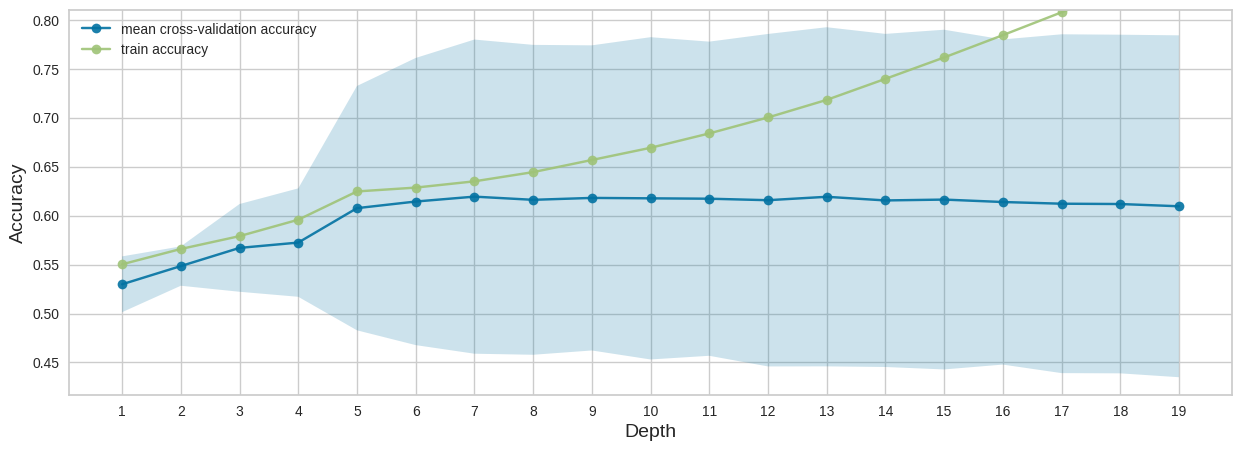

In [80]:
# run the functions in order to display the results

# create a list of depths
tree_depths = range(1,20)

# get scores, standard deviations, accuracy scores for our dataset with all the depths we have
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(X_res2, y_res2, tree_depths)

# plot the results
plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores)

In [81]:
max_mean = cv_scores_mean.argmax()
best_tree_depth = tree_depths[max_mean]
best_tree_cv_score = cv_scores_mean[max_mean]
best_tree_cv_score_std = cv_scores_std[max_mean]
print('The tree with the depth {} has the best mean cross-validation accuracy which is {} on the train set'.format(best_tree_depth, round(best_tree_cv_score*100,5)))

The tree with the depth 7 has the best mean cross-validation accuracy which is 61.94013 on the train set


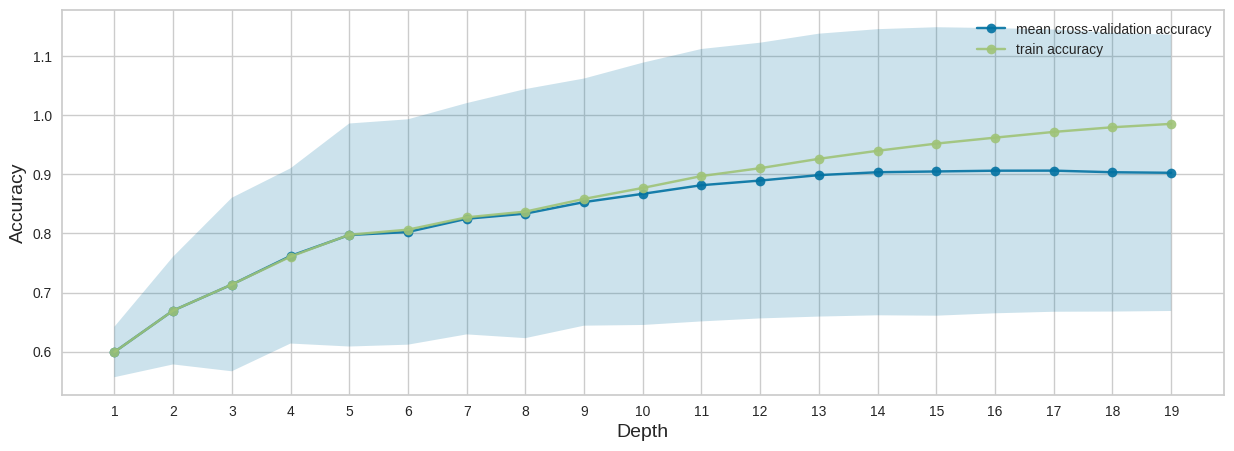

In [82]:
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(X_res3, y_res3, tree_depths)
plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores)

In [83]:
max_mean = cv_scores_mean.argmax()
best_tree_depth = tree_depths[max_mean]
best_tree_cv_score = cv_scores_mean[max_mean]
best_tree_cv_score_std = cv_scores_std[max_mean]
print('The tree with the depth {} has the best mean cross-validation accuracy which is {} on the train set'.format(best_tree_depth, round(best_tree_cv_score*100,5)))

The tree with the depth 17 has the best mean cross-validation accuracy which is 90.62908 on the train set


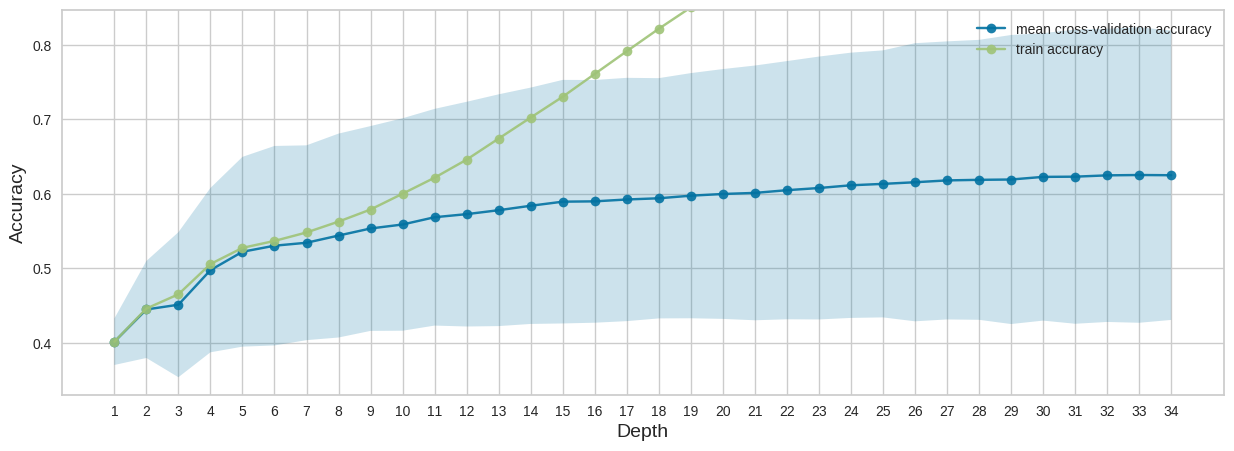

In [86]:
tree_depths = range(1,35)
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(X_res1, y_res1, tree_depths)
plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores)

In [87]:
max_mean = cv_scores_mean.argmax()
best_tree_depth = tree_depths[max_mean]
best_tree_cv_score = cv_scores_mean[max_mean]
best_tree_cv_score_std = cv_scores_std[max_mean]
print('The tree with the depth {} has the best mean cross-validation accuracy which is {} on the train set'.format(best_tree_depth, round(best_tree_cv_score*100,5)))

The tree with the depth 33 has the best mean cross-validation accuracy which is 62.53398 on the train set


In [ ]:
nb = GaussianNB()
nb = nb.fit(X_res2, y_res2)
y_pred = nb.predict(X_test2)
print("Classification report for classifier %s:\n%s\n"
      % (nb, classification_report(y_test2, y_pred)))

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.65      0.46      0.54     10562
           1       0.44      0.63      0.52      7081

    accuracy                           0.53     17643
   macro avg       0.55      0.55      0.53     17643
weighted avg       0.57      0.53      0.53     17643




In [ ]:
nb = GaussianNB()
nb = nb.fit(X_res3, y_res3)
y_pred = nb.predict(X_test3)
print("Classification report for classifier %s:\n%s\n"
      % (nb, classification_report(y_test3, y_pred)))

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.91      0.63      0.75     16071
           1       0.09      0.38      0.15      1572

    accuracy                           0.61     17643
   macro avg       0.50      0.50      0.45     17643
weighted avg       0.84      0.61      0.69     17643




In [ ]:
nb = GaussianNB()
nb = nb.fit(X_res3, y_res3)
y_pred = nb.predict(X_test3)
print("Classification report for classifier %s:\n%s\n"
      % (nb, classification_report(y_test3, y_pred)))

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.91      0.63      0.75     16071
           1       0.09      0.38      0.15      1572

    accuracy                           0.61     17643
   macro avg       0.50      0.50      0.45     17643
weighted avg       0.84      0.61      0.69     17643




In [ ]:
knn = KNeighborsClassifier()
knn = knn.fit(X_res2, y_res2)
y_pred = knn.predict(X_test2)
print("Classification report for classifier %s:\n%s\n"
      % (knn, classification_report(y_test2, y_pred)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.63      0.47      0.54     10562
           1       0.43      0.59      0.49      7081

    accuracy                           0.52     17643
   macro avg       0.53      0.53      0.52     17643
weighted avg       0.55      0.52      0.52     17643




In [ ]:
knn = KNeighborsClassifier()
knn = knn.fit(X_res3, y_res3)
y_pred = knn.predict(X_test3)
print("Classification report for classifier %s:\n%s\n"
      % (knn, classification_report(y_test3, y_pred)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.91      0.54      0.68     16071
           1       0.09      0.47      0.15      1572

    accuracy                           0.54     17643
   macro avg       0.50      0.50      0.42     17643
weighted avg       0.84      0.54      0.63     17643




In [ ]:
knn = KNeighborsClassifier()
knn = knn.fit(X_res1, y_res1)
y_pred = knn.predict(X_test1)
print("Classification report for classifier %s:\n%s\n"
      % (knn, classification_report(y_test1, y_pred)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.63      0.36      0.46     10562
           1       0.32      0.39      0.35      5509
           2       0.10      0.31      0.15      1572

    accuracy                           0.36     17643
   macro avg       0.35      0.35      0.32     17643
weighted avg       0.49      0.36      0.40     17643




In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y1 = pca.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans2 = KMeans(n_clusters=2, random_state=0, n_init="auto")
dataset['labelk2'] = kmeans2.fit_predict(X)

Text(0.5, 1.0, 'Actual clusters')

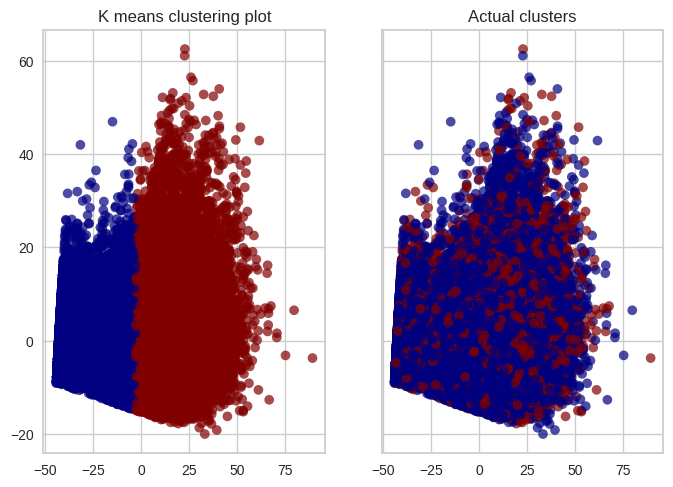

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y1[:,0],Y1[:,1],  c = dataset['labelk2'], cmap = "jet", edgecolor = "None", alpha=0.7)
ax1.set_title('K means clustering plot')

ax2.scatter(Y1[:,0],Y1[:,1],  c = dataset['readmitted2'], cmap = "jet", edgecolor = "None", alpha=0.7)
ax2.set_title('Actual clusters')

In [ ]:
from sklearn.cluster import DBSCAN
eps = 0.5  # The maximum distance between two samples for them to be considered as neighbors
min_samples = 5  # The minimum number of samples required in a neighborhood to form a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dataset['labeld'] = dbscan.fit_predict(X)

Text(0.5, 1.0, 'Actual clusters')

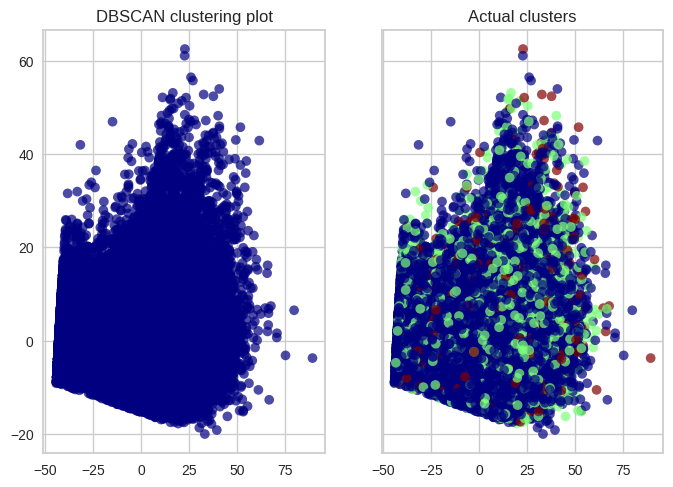

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y1[:,0],Y1[:,1],  c = dataset['labeld'], cmap = "jet", edgecolor = "None", alpha=0.7)
ax1.set_title('DBSCAN clustering plot')

ax2.scatter(Y1[:,0],Y1[:,1],  c = dataset['readmitted1'], cmap = "jet", edgecolor = "None", alpha=0.7)
ax2.set_title('Actual clusters')